In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import pandas as pd
import matplotlib as m
from scipy.special import logsumexp

# TDMA Solver

In [2]:
def solver_TDMA(a,b,c,d):
    '''b---> diagonal numpy array
        a--> lower triangle
        c--> upper triangle
        d--> matrix at right'''
    n=b.shape[0]
    ac,bc,cc,dc=map(np.array,(a,b,c,d)) #creating copy of elements
    # FoRWARD elimination
    for i in range(1,n):
        m=ac[i-1]/bc[i-1]
        bc[i]=bc[i]-m*cc[i-1]
        dc[i]=dc[i]-m*dc[i-1]
    #Backward substitution
    x=np.zeros((n,))
    for i in range(n-1,-1,-1):
        if (i==(n-1)):
            x[n-1]=dc[n-1]/bc[n-1]
        else:
            x[i]=(dc[i]-cc[i]*x[i+1])/bc[i]

    return x

# Project-1

## (A)

In [51]:
'''
    AnalYtiCAl SoLuTioN

    T=(-1)(T_left-T_right)/L + T_left

'''
BC_right=100
BC_left=20
nx=[11,21,41,101]
mark=["o","v","^","1"]
l=0
fig, axs = plt.subplots(2,2, figsize=(15, 15), facecolor='w', edgecolor='b',dpi=720)
fig.subplots_adjust(hspace = .2, wspace=.2)
plt.figure(dpi=1200)
plt.rcParams.update({'font.size':12})
axs = axs.ravel()
color = iter(cm.rainbow(np.linspace(0, 1, 4)))
#plt.figure(dpi=1200)
for i in nx:#reversed(nx):
    b=(-2)*np.ones((i-2,))
    a=np.ones((i-3,))
    c=np.ones((i-3,))
    d=np.zeros((i-2,))
    d[0]=-BC_left
    d[len(d)-1]=-BC_right
    x=solver_TDMA(a,b,c,d)
    x=np.append(x,BC_right)
    x=np.insert(x,0,BC_left)
    y=np.linspace(0,1,i)
    x_true=(BC_right-BC_left)*y + BC_left
    au=next(color)
    axs[l].plot(y,x_true,linestyle='-.',linewidth=1.5,color='black',label='Analytical Solution')
    axs[l].scatter(y,x,marker=mark[l],color=au,label='Numerical Solution')
    axs[l].set_xlim(left=0,right=1)
    axs[l].set_ylim([BC_left-5,BC_right])
    axs[l].set_xlabel('x (m)',fontsize=12,fontweight='bold')
    axs[l].set_ylabel(' T (K)',fontsize=12,fontweight='bold')
    axs[l].set_title('n ='+str(i-1))
    axs[l].legend(loc='best',edgecolor='black')
    for s in ["bottom","top","left","right"]:
        axs[l].spines[s].set_linewidth(2)
    l=l+1
del(a,b,c,d,x,y)

<Figure size 7200x4800 with 0 Axes>

## (B)

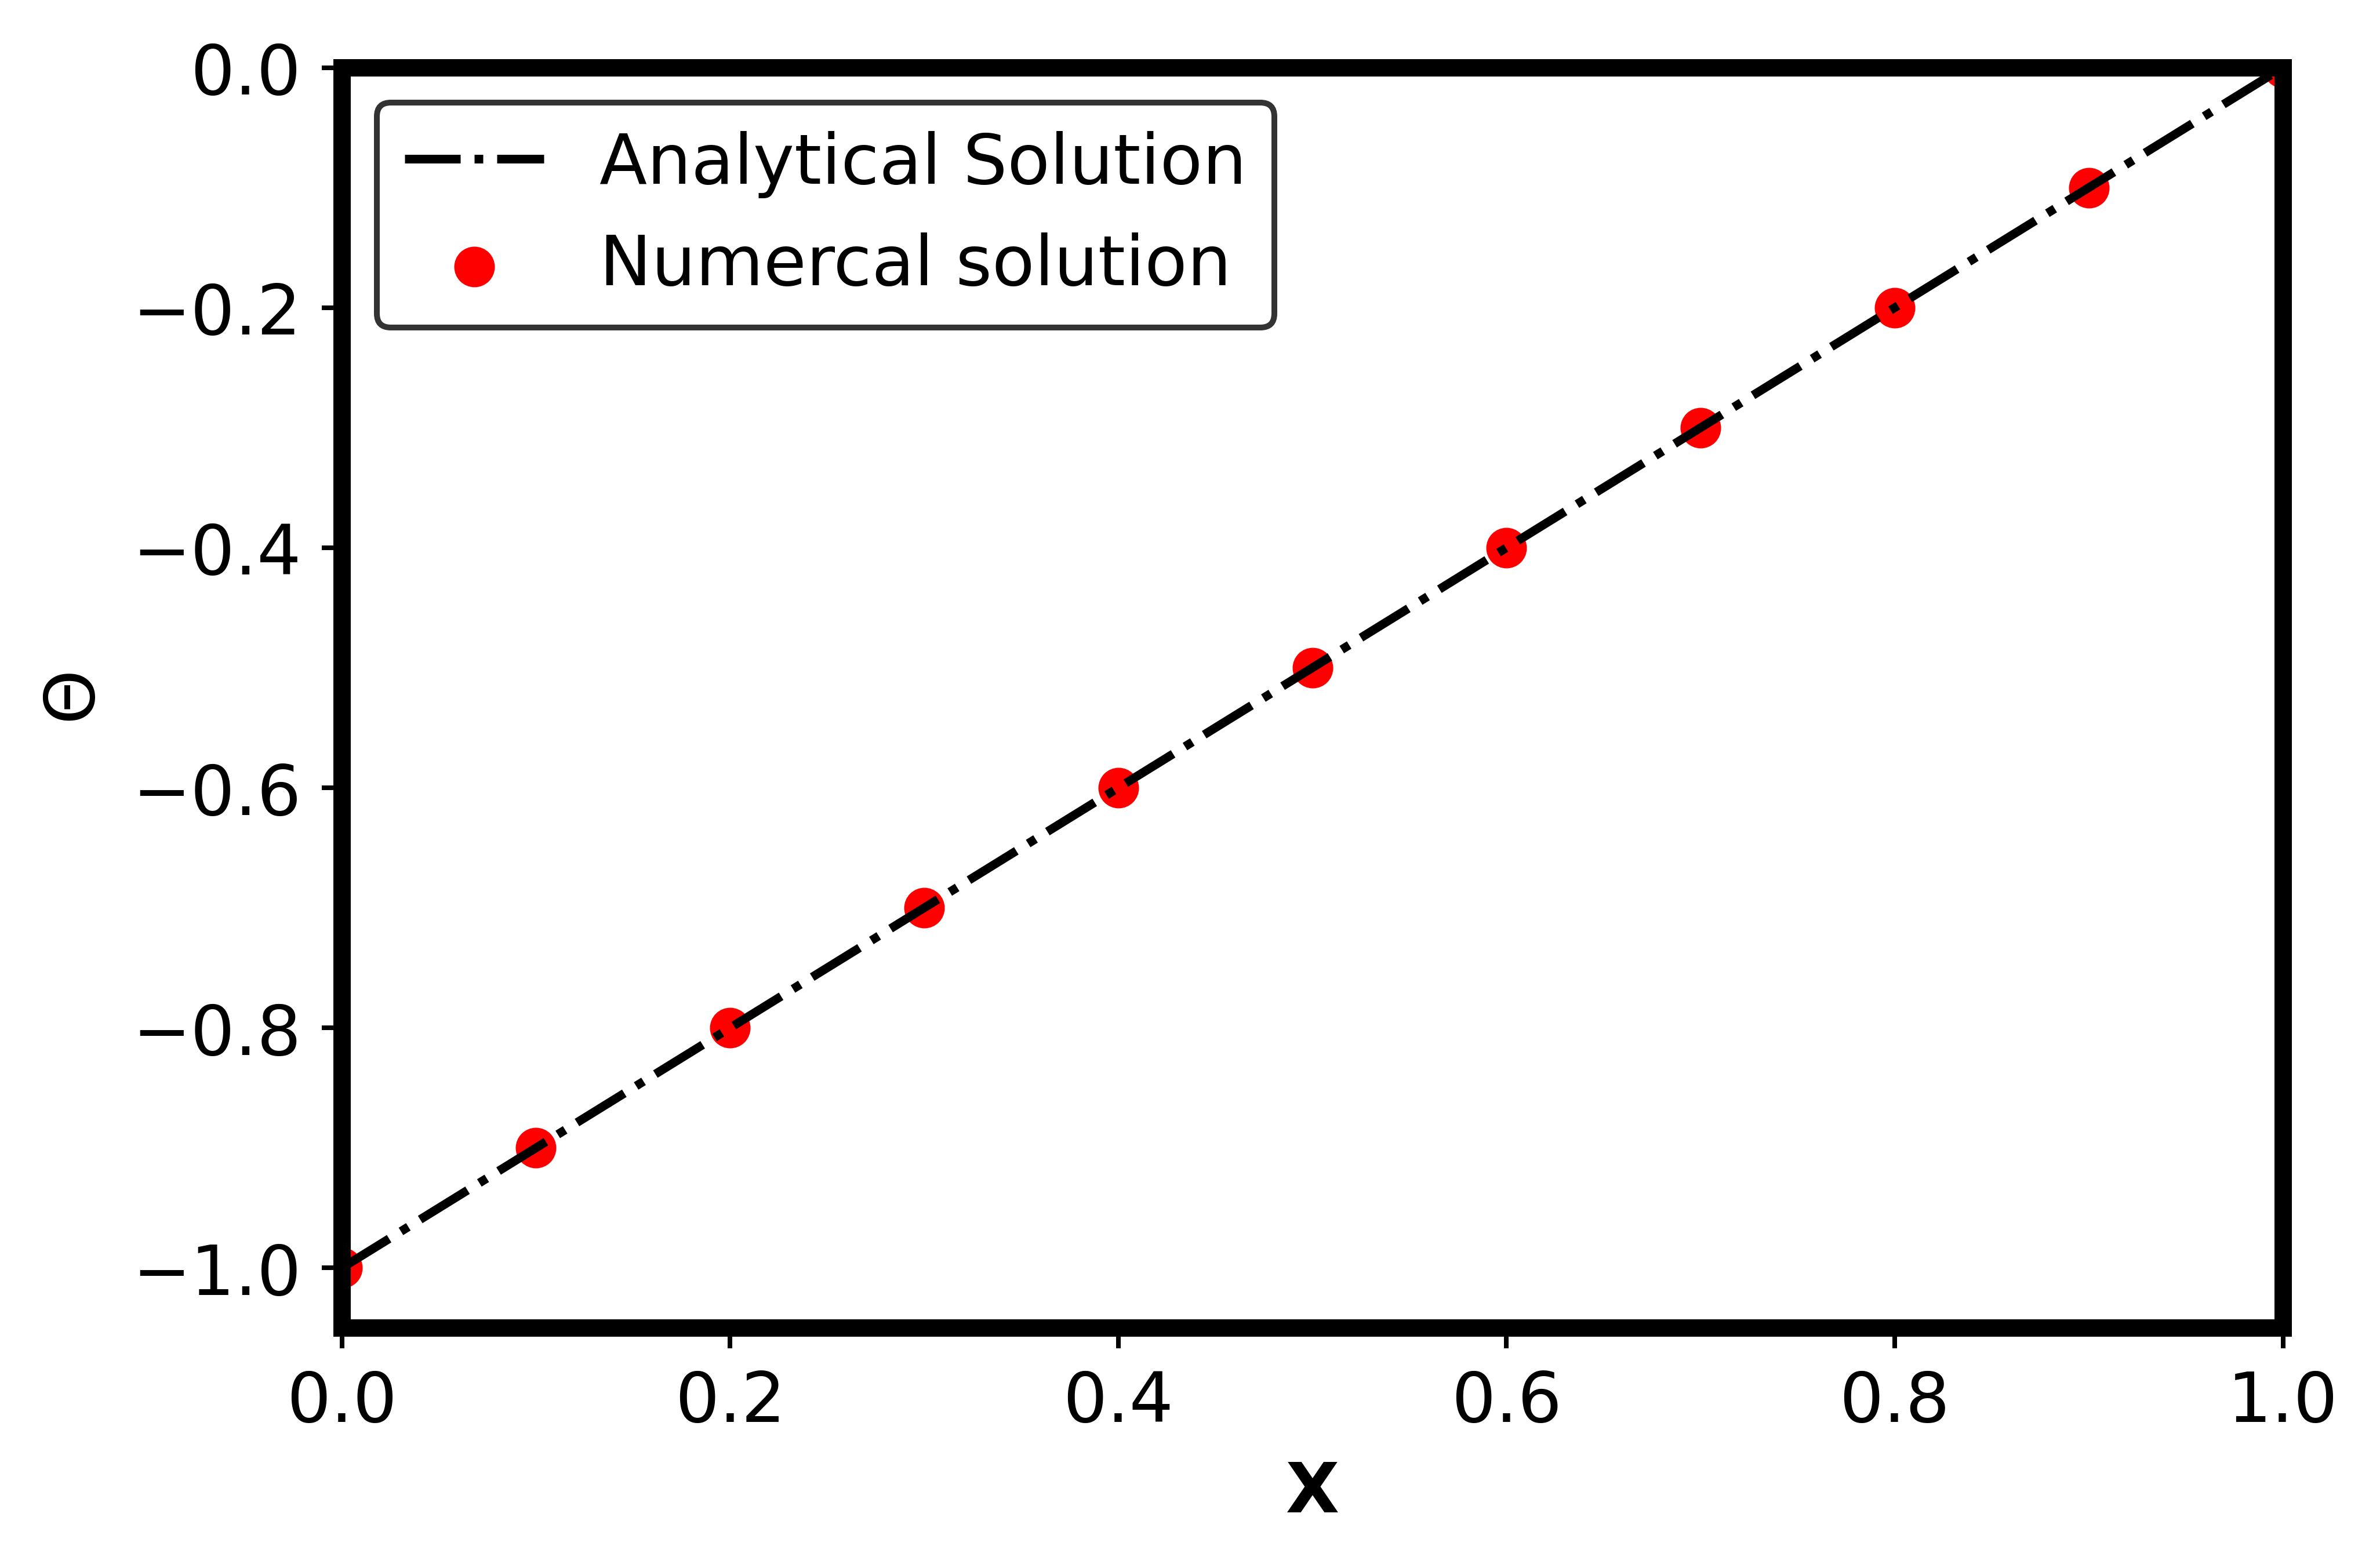

In [52]:
'''
    AnalyTiCaL SolUtiON
        \theta = x-1
    
'''
#for non-dimensionalised flux at inlet
plt.figure(dpi=720)
BC_right=0
n=11
b=(-2)*np.ones((n-1,))
b[0]=-1#due to flux
a=np.ones((n-2,))
c=np.ones((n-2,))
d=np.zeros((n-1,))
d[0]=1/(n-1)
d[len(d)-1]=0
x=solver_TDMA(a,b,c,d)
x=np.append(x,0)
y=np.linspace(0,1,n)
y_more=np.linspace(0,1,100)
x_true=y_more-1 # analytical solution
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.plot(y_more,x_true,linestyle='-.',label='Analytical Solution',color='black')
plt.scatter(y,x,color='red',label='Numercal solution')
plt.xlim(0,1)
plt.ylim(-1.05,0)
plt.xlabel(' X ',fontsize=12,fontweight='bold')
plt.ylabel('$\Theta$',fontsize=12,fontweight='bold')
plt.legend(edgecolor='black')

#plt.axes().axhline(linewidth=2)
#plt.axes().axvline(linewidth=2)
#plt.axes().seet()#plt.rcParams.update({'width':12})

In [53]:
x

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ])

## (C)

(-7.3, -4.0)

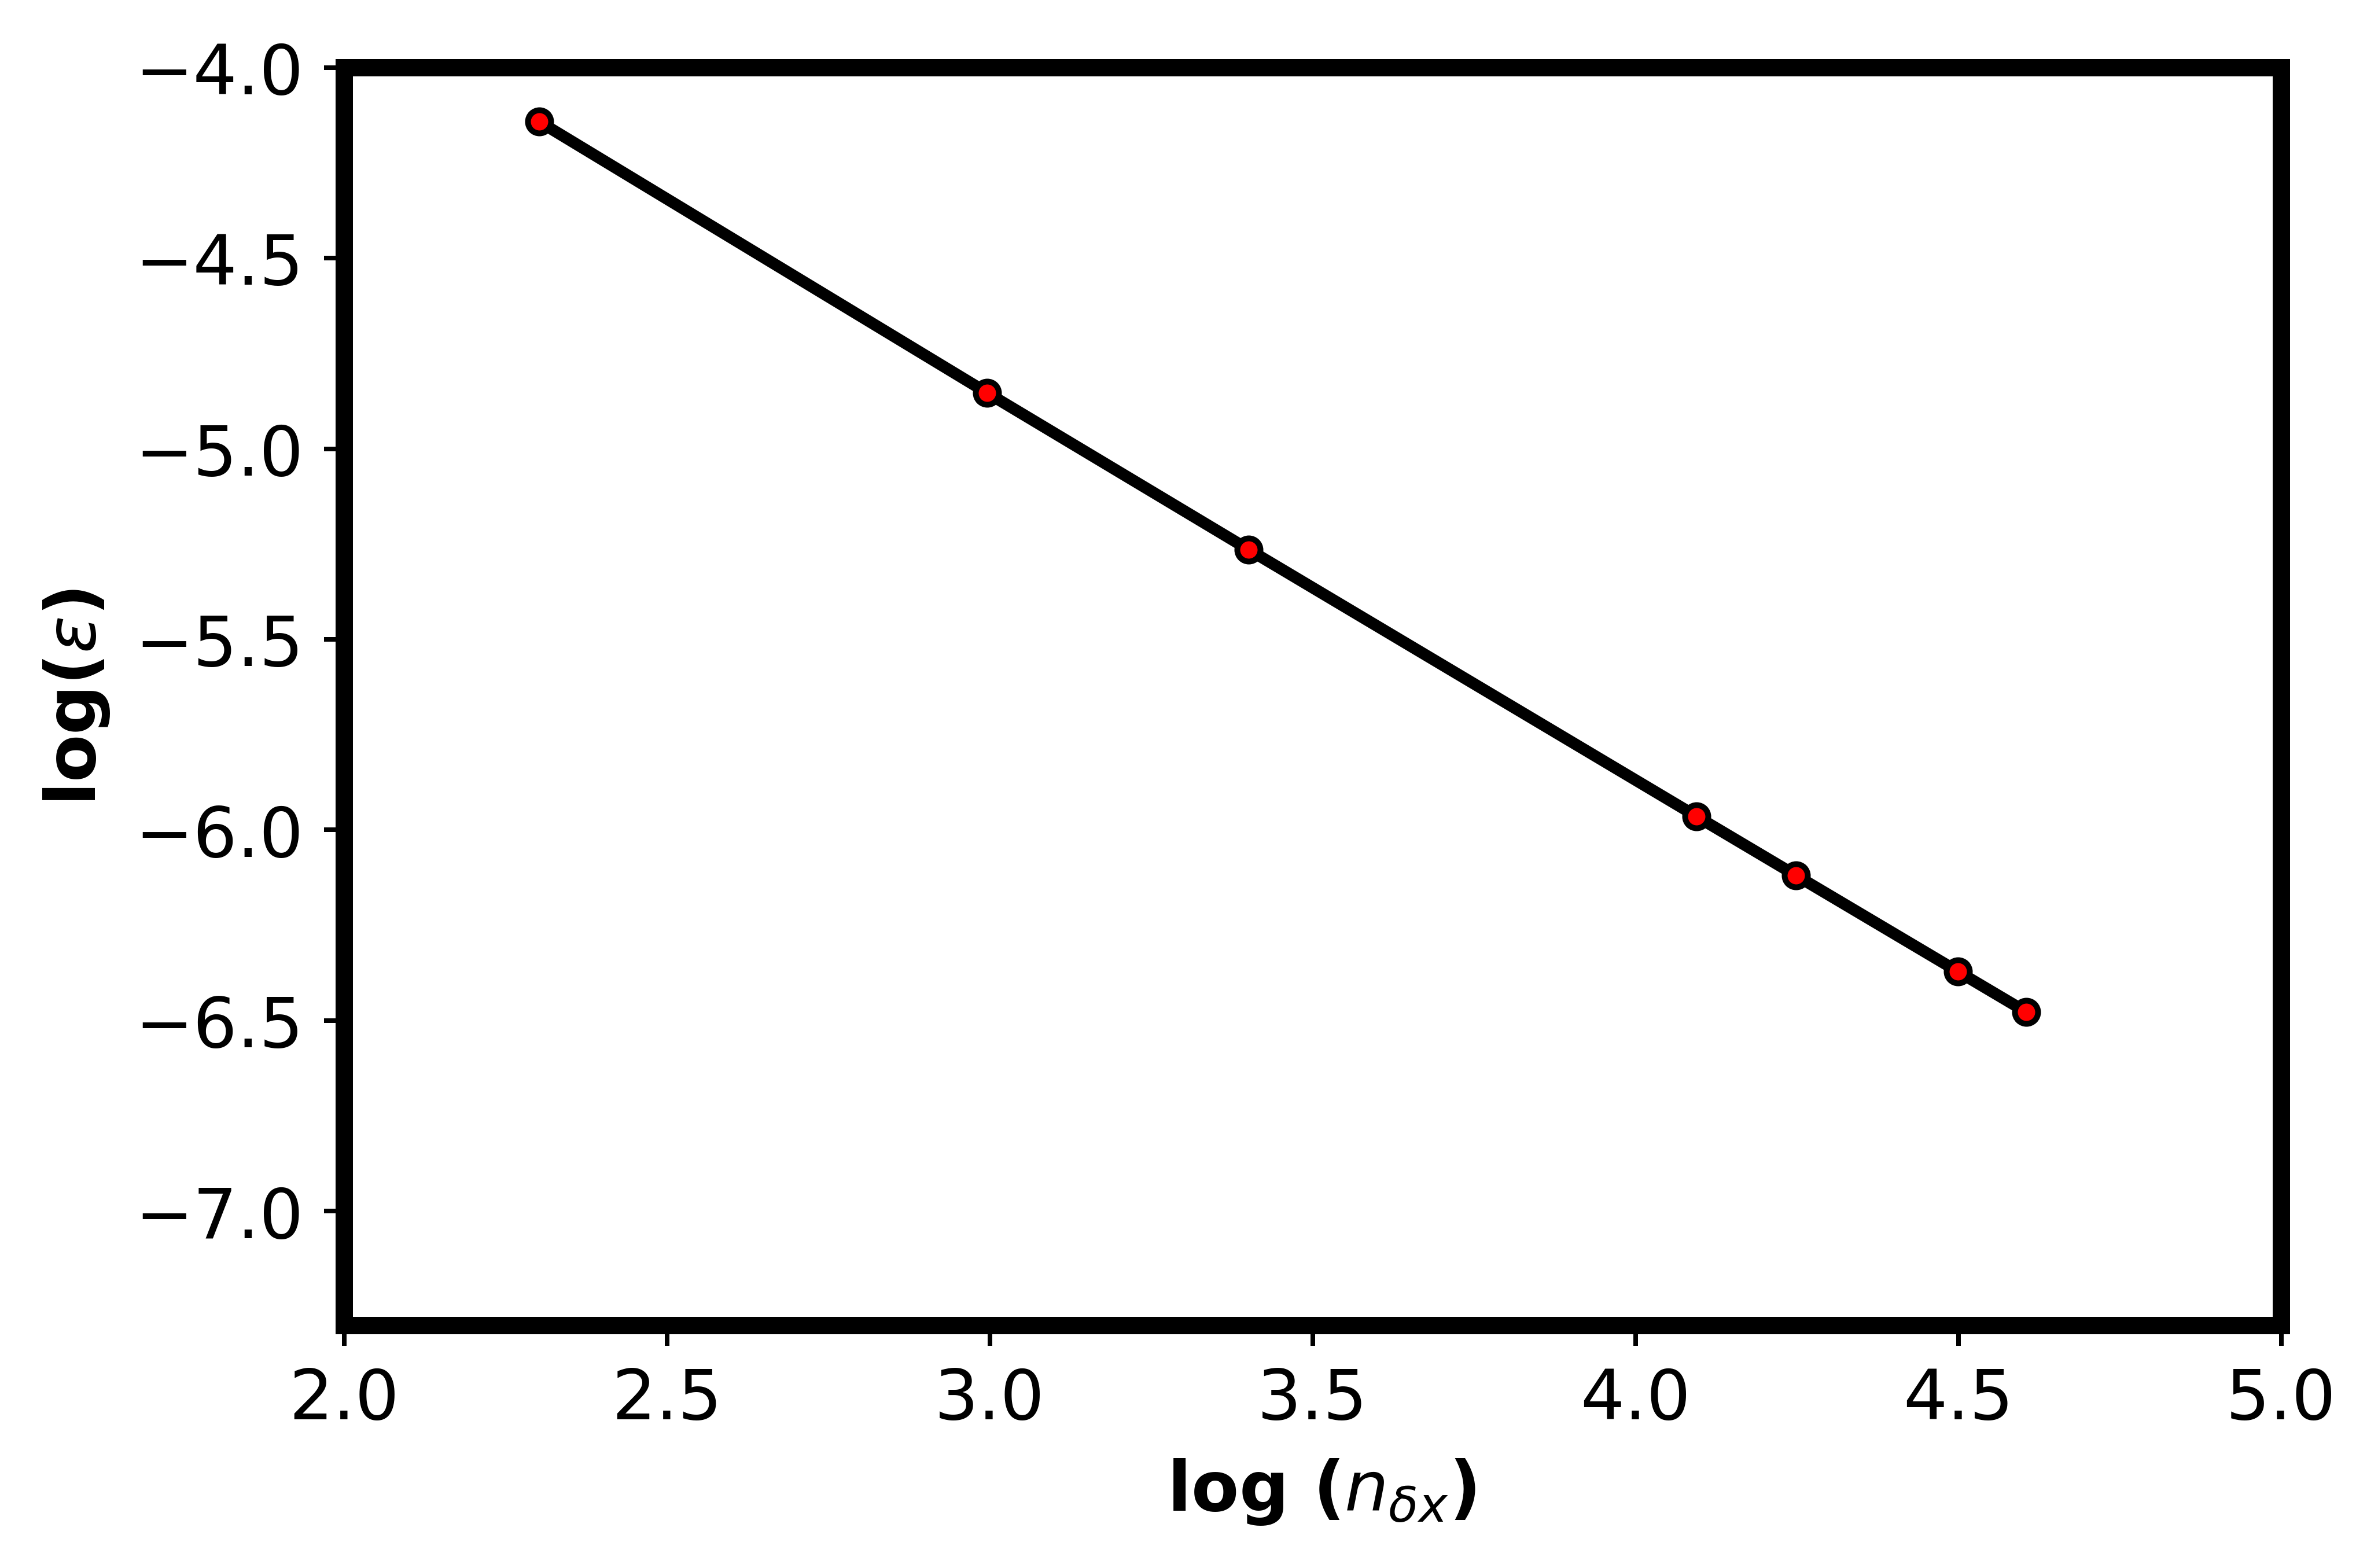

In [54]:
''' 
    AnalyTical SolUTioN

    T=-(gen)(x^2)/(2*k_cond) - flux/(k_cond)*x +(bc_right + (gen)(length^2)/(2*k_cond) + flux/(k_cond)*length )


'''
plt.figure(dpi=720)
# domain length
length =1
# number of points in x-direction
n=[11,21,31,61,71,91,101] 
l2_norm=np.zeros([len(n),])
divison=np.zeros([len(n),])
# conductivity
k_cond=1
# flux at left Boundary
flux=1
# volumetric heat generation
gen=1
# fixed Temperature at right boundary
bc_right=1
# array
iterr=0
for i in n:
    # Grid spacing
    dx=1/(i-1)
    b=(-2)*np.ones((i-1,))
    b[0]=-1# due to flux term ---> T_1 - T_2
    a=np.ones((i-2,))
    c=np.ones((i-2,))
    d=np.ones((i-1,))*(-gen/k_cond)*(dx*dx)
    d[0]=(-flux/k_cond)*dx
    d[len(d)-1]=d[len(d)-1]-bc_right
    x=solver_TDMA(a,b,c,d)
    y=np.linspace(0,1,i)
    y=np.resize(y,y.size-1)
    x_true=-(gen)*(y*y)/(2*k_cond) - flux/(k_cond)*y +(bc_right + (gen)*(length*length)/(2*k_cond) + flux/(k_cond)*length )
    l2_norm[iterr]=math.log(np.linalg.norm(x-x_true)/np.linalg.norm(x_true))
    divison[iterr]=math.log(i-1)
    iterr=iterr+1
    del(a,b,c,d,x,y,x_true)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.plot(divison,l2_norm,linewidth=2,color='black',marker='o',markersize=4,markerfacecolor='red')
plt.xlabel(' log ($n_{\delta x}$) ',fontsize=12,fontweight='bold')
plt.ylabel('log($\epsilon$)',fontsize=12,fontweight='bold')
plt.xlim(left=2,right=5)
plt.ylim(bottom=-7.3,top=-4)


In [55]:
slope=(l2_norm[0]-l2_norm[len(l2_norm)-1])/(divison[0]-divison[len(divison)-1])
slope

-1.0141093783237671

Text(0, 0.5, 'T (K)')

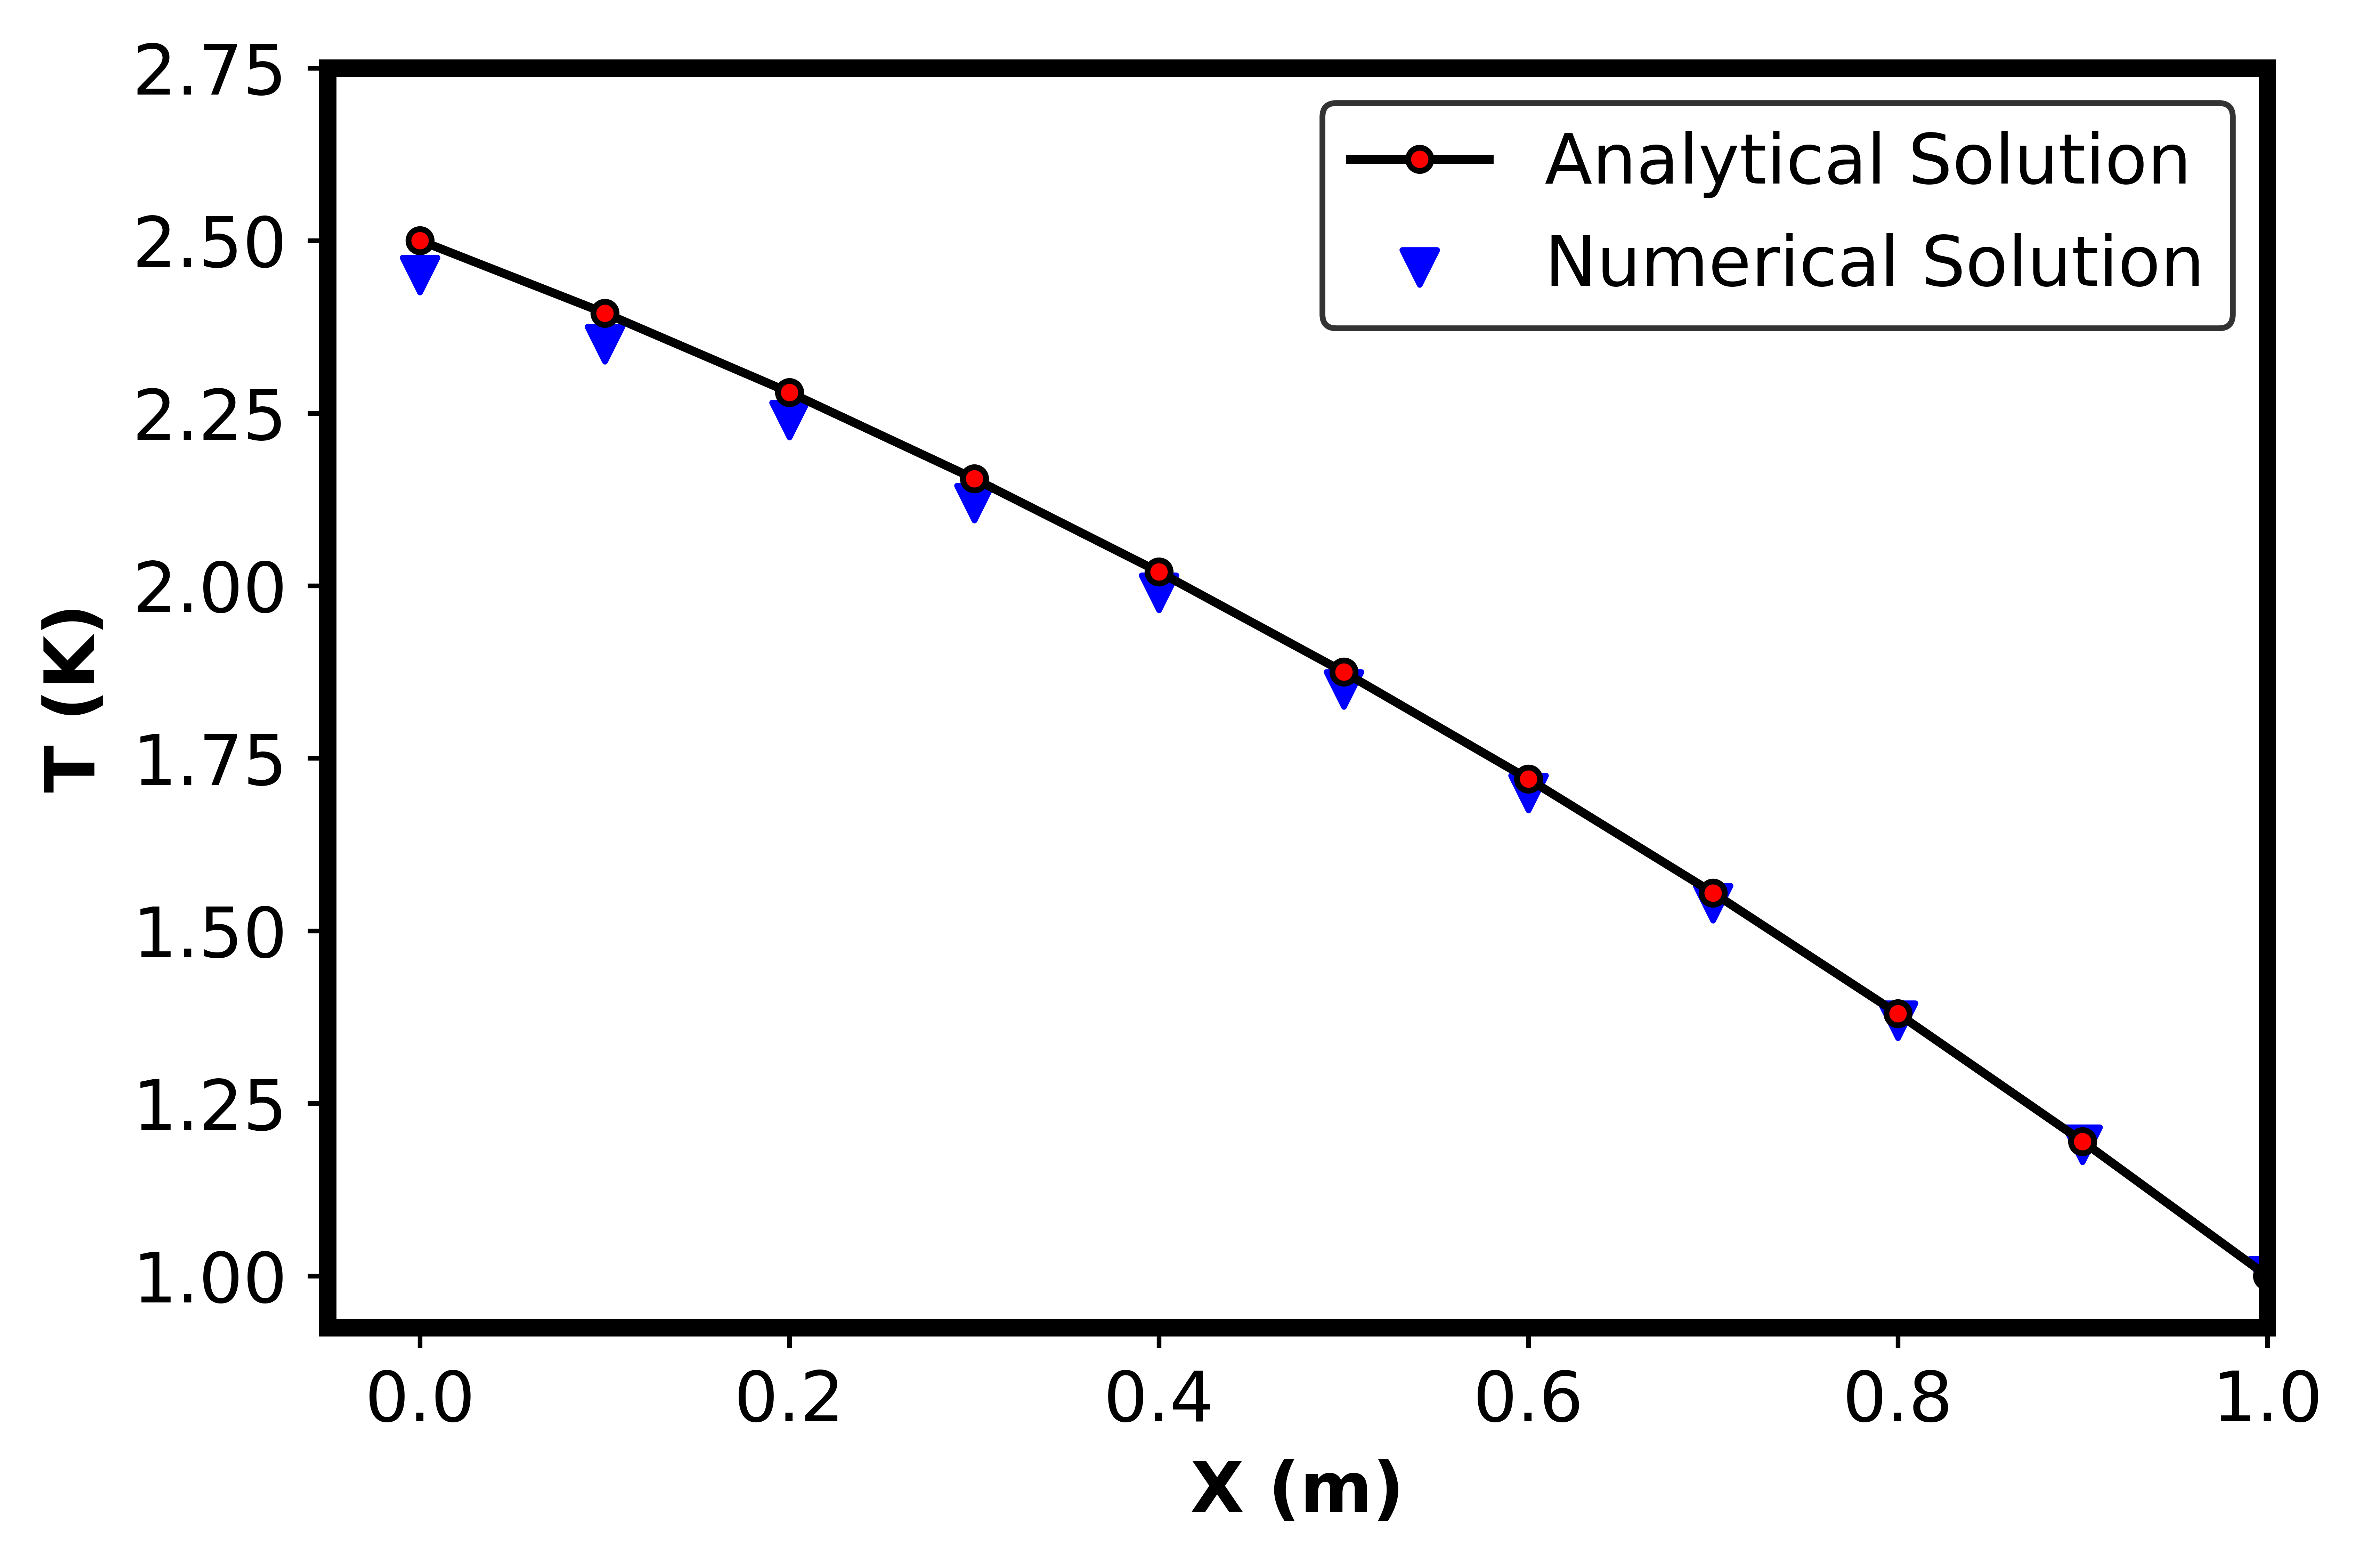

In [56]:
plt.figure(dpi=1200)
# domain length
length =1
# number of points in x-direction
n=[11]
# conductivity
k_cond=1
# flux at left Boundary
flux=1
# volumetric heat generation
gen=1
# fixed Temperature at right boundary
bc_right=1
for i in n:
    # Grid spacing
    dx=1/(i-1)
    b=(-2)*np.ones((i-1,))
    b[0]=-1# due to flux term ---> T_1 - T_2
    a=np.ones((i-2,))
    c=np.ones((i-2,))
    d=np.ones((i-1,))*(-gen/k_cond)*(dx*dx)
    d[0]=(-flux/k_cond)*dx
    d[len(d)-1]=d[len(d)-1]-bc_right
    x=solver_TDMA(a,b,c,d)
    y=np.linspace(0,length,i)
    y=np.resize(y,y.size-1)
    x_true=-(gen)*(y*y)/(2*k_cond) - flux/(k_cond)*y +(bc_right + (gen)*(length*length)/(2*k_cond) + flux/(k_cond)*length )
x=np.append(x,bc_right)
y=np.append(y,length)
x_true=np.append(x_true,bc_right)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.plot(y,x_true,color='black',marker='o',markersize=4,markerfacecolor='red',label='Analytical Solution')
plt.scatter(y,x,color='blue',marker='v',label='Numerical Solution')
plt.legend(edgecolor='black')
plt.xlim(right=length)
plt.ylim(top=max(x_true)+max(x_true)*.1)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('T (K)',fontsize=12,fontweight='bold')

# Project 2

$$ \frac{\partial T}{\partial t} = {\alpha}  \frac{\partial^2 T}{\partial x^2} $$
<br> Conditions:
<br> 1. $T_i=30$
<br> 2. $T_h=100$
<br> 3. $T_l =0$
<br> 4. $ \alpha =1e-4 m^2/s $
<br> 5. $ L = 10 m $

In [21]:
%precision 4

'%.4f'

## Crank-Nicholson

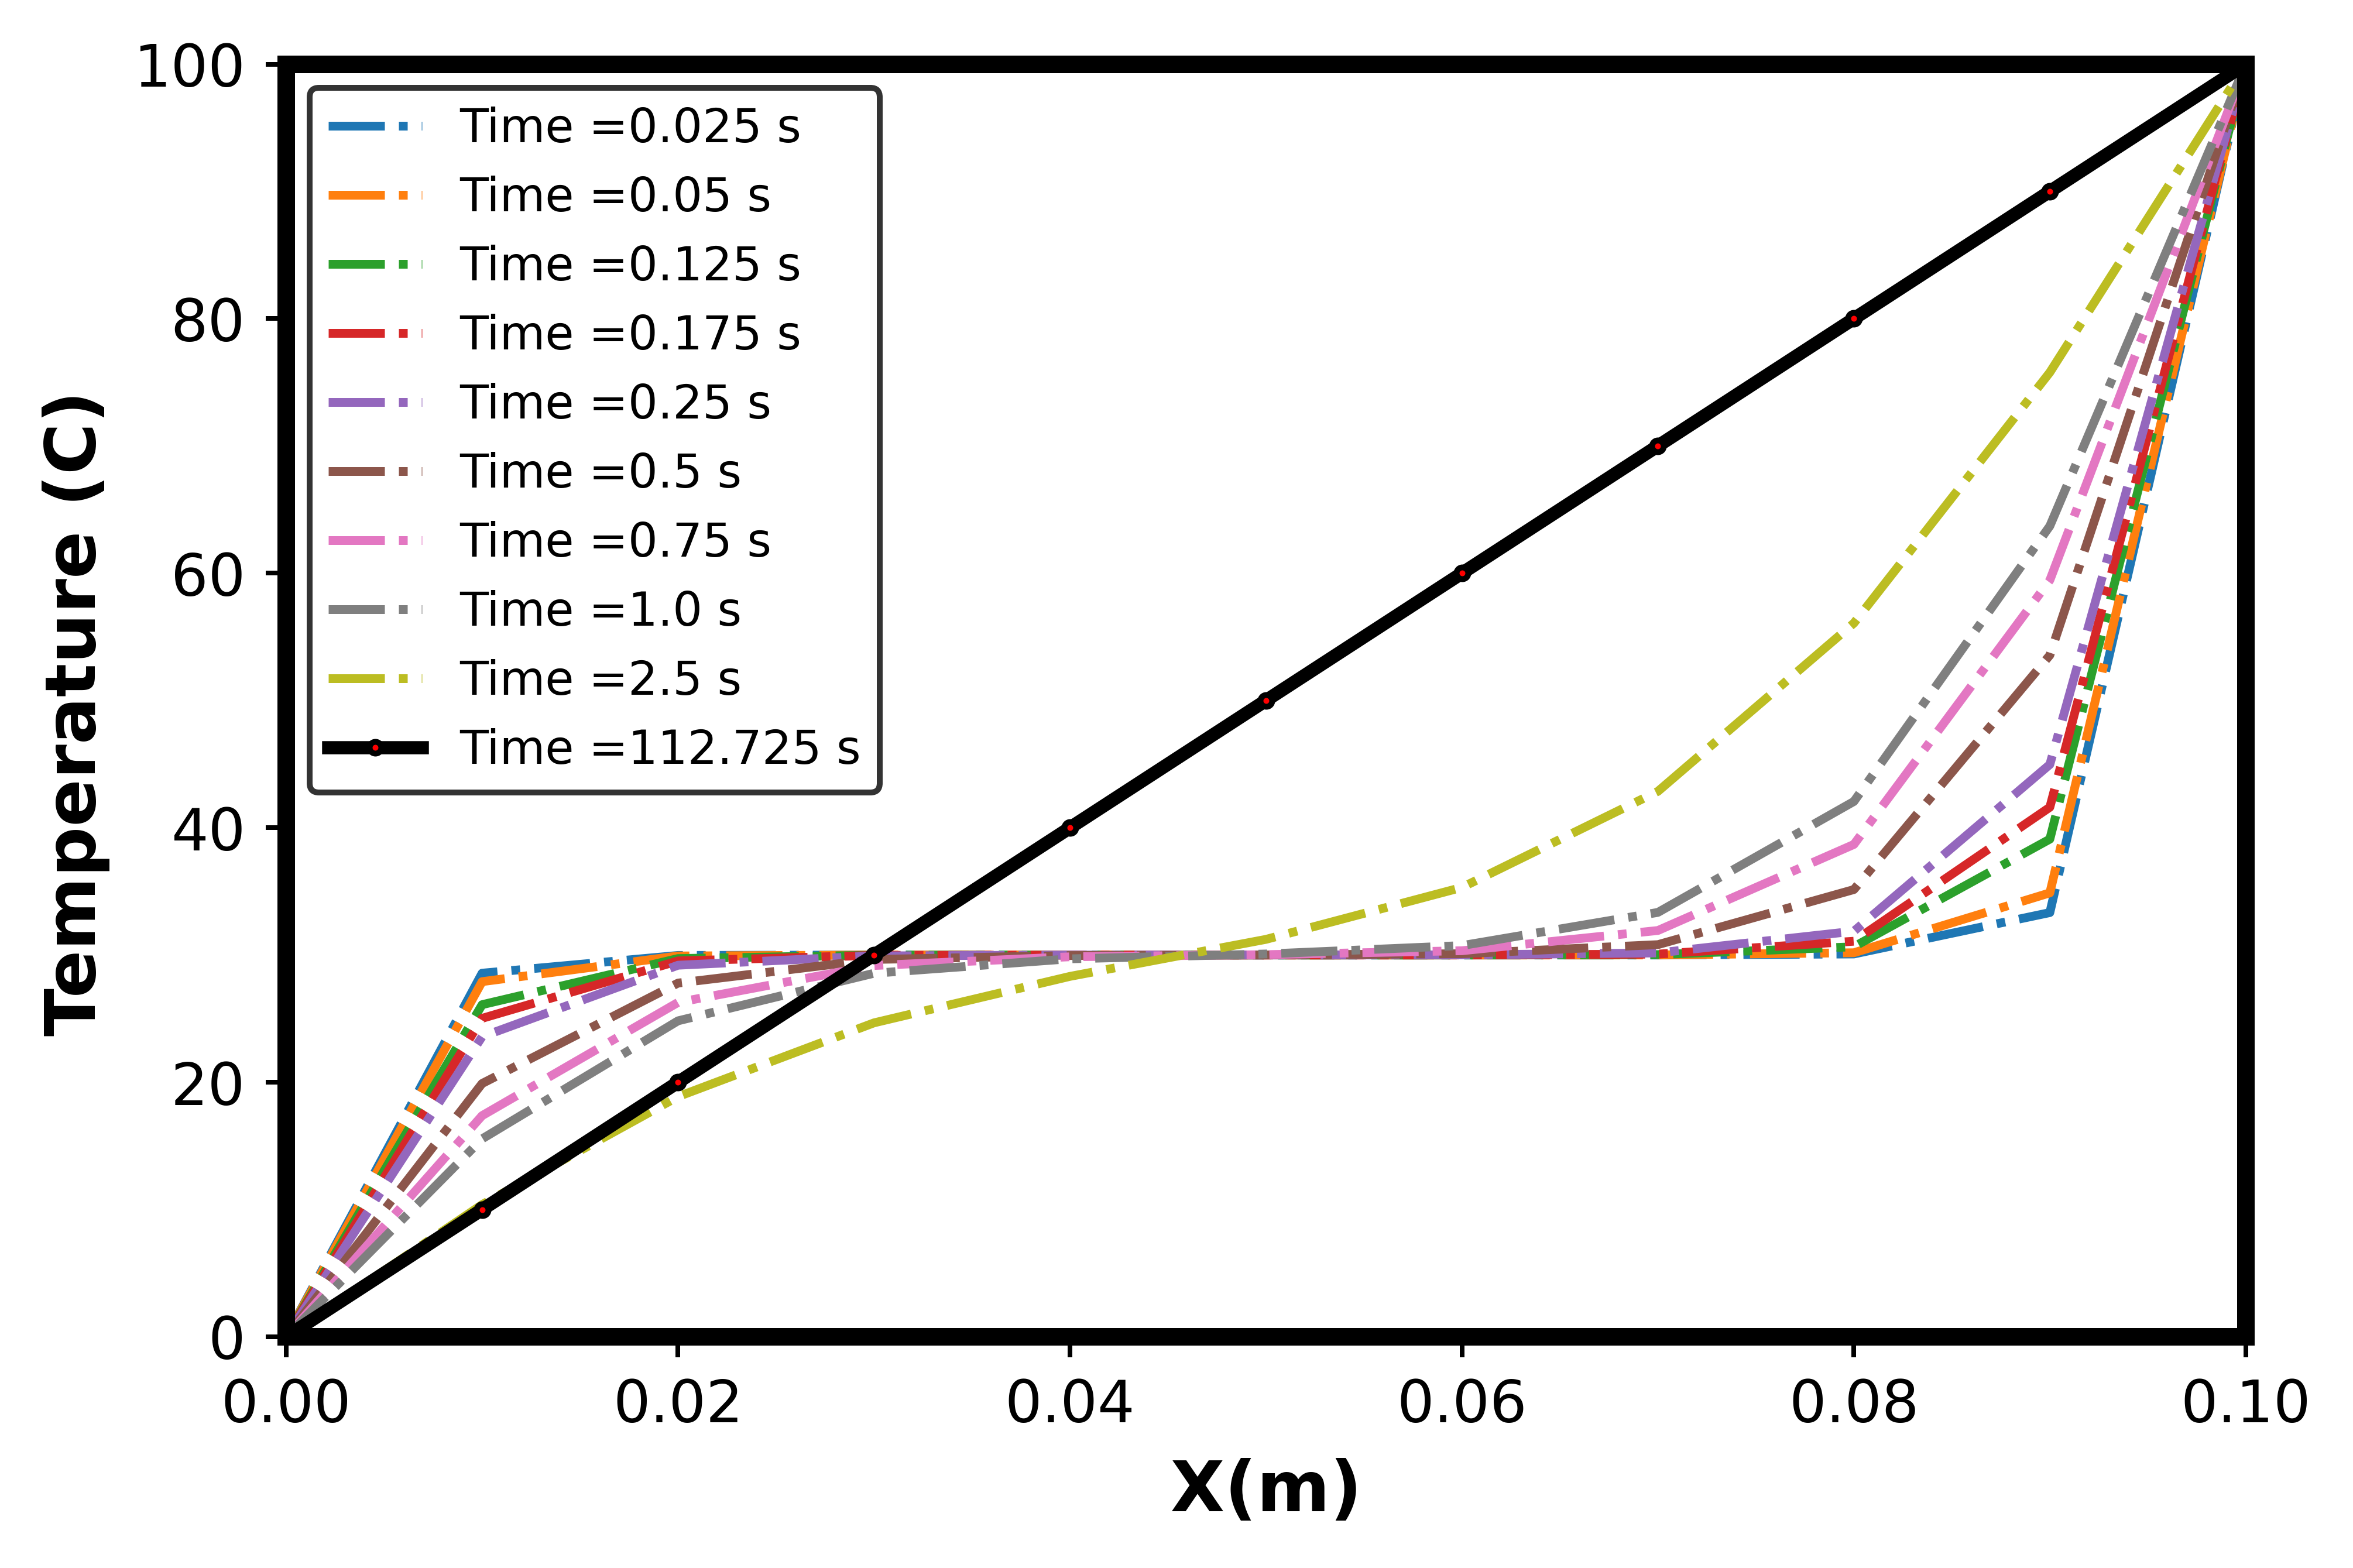

In [4]:
plt.figure(dpi=720)
#number of elements
n=101
#space between grid points
length=.1
dx=length/(n-1)
#thermal diffusivity
alpha=1e-4
#Boundary conditions
T_left=0
T_right=100
# initial condition
To=30
#Time step
dt=0.025
# weighting fasctor for scheme
f=0.5
#initialise the old and next time step values
T=np.ones((n,))*To
T[0]=T_left
T[n-1]=T_right
T_old=T.copy()
#matrix element --> for TDMA
b=np.ones((n-2,))*(1+f*2*alpha*dt/(dx*dx))
a=np.ones((n-3,))*(-1)*f*alpha*dt/(dx*dx)
c=np.ones((n-3,))*(-1)*f*alpha*dt/(dx*dx)
d=np.ones((n-2,))
# plot details
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X(m) ',fontsize=12,fontweight='bold')
plt.ylabel('Temperature (C) ',fontsize=12,fontweight='bold')
plt.xlim(left=0,right=length)
plt.ylim(bottom=T_left,top=T_right)
plot_time_loop=[0.2,0.5,1,2,5,7,10,20,30,40,100]
#initial time
t=0.0
#for convergence
error=1
loop=int(0)
while(error>1e-6):

    for i in range(0,n-2):
        d[i]=T_old[i+1]+alpha*(1-f)*(dt/pow(dx,2))*(T_old[i+2]-2*T_old[i+1]+T_old[i])
        if i==0:
            d[i]=d[i]+alpha*(f)*(dt/pow(dx,2))*T_left
        if i==(n-3):
            d[i]=d[i]+alpha*(f)*(dt/pow(dx,2))*T_right
    T[1:n-1,]=solver_TDMA(a,b,c,d)
    error=max(abs(T-T_old))
    T_old=T.copy()
    if(loop in plot_time_loop):
        y=np.linspace(0,length,n)
        plt.plot(y,T,label="Time ="+str(round(t,3))+' s',linestyle='-.',linewidth=1.5)
    t=t+dt
    loop=loop+int(1)
y=np.linspace(0,length,n)
plt.plot(y,T,label="Time ="+str(round(t,3))+' s',linewidth=2.25,color='black',marker='o',markerfacecolor='red',markersize='2')
plt.legend(edgecolor='black',loc='best',fontsize=8)
#plt.arrow(x=.05,y=20,dx=-0.01,dy=20,head_width=.001,ec='black')
del(plot_time_loop,a,b,c,d,t,T,T_old,loop)

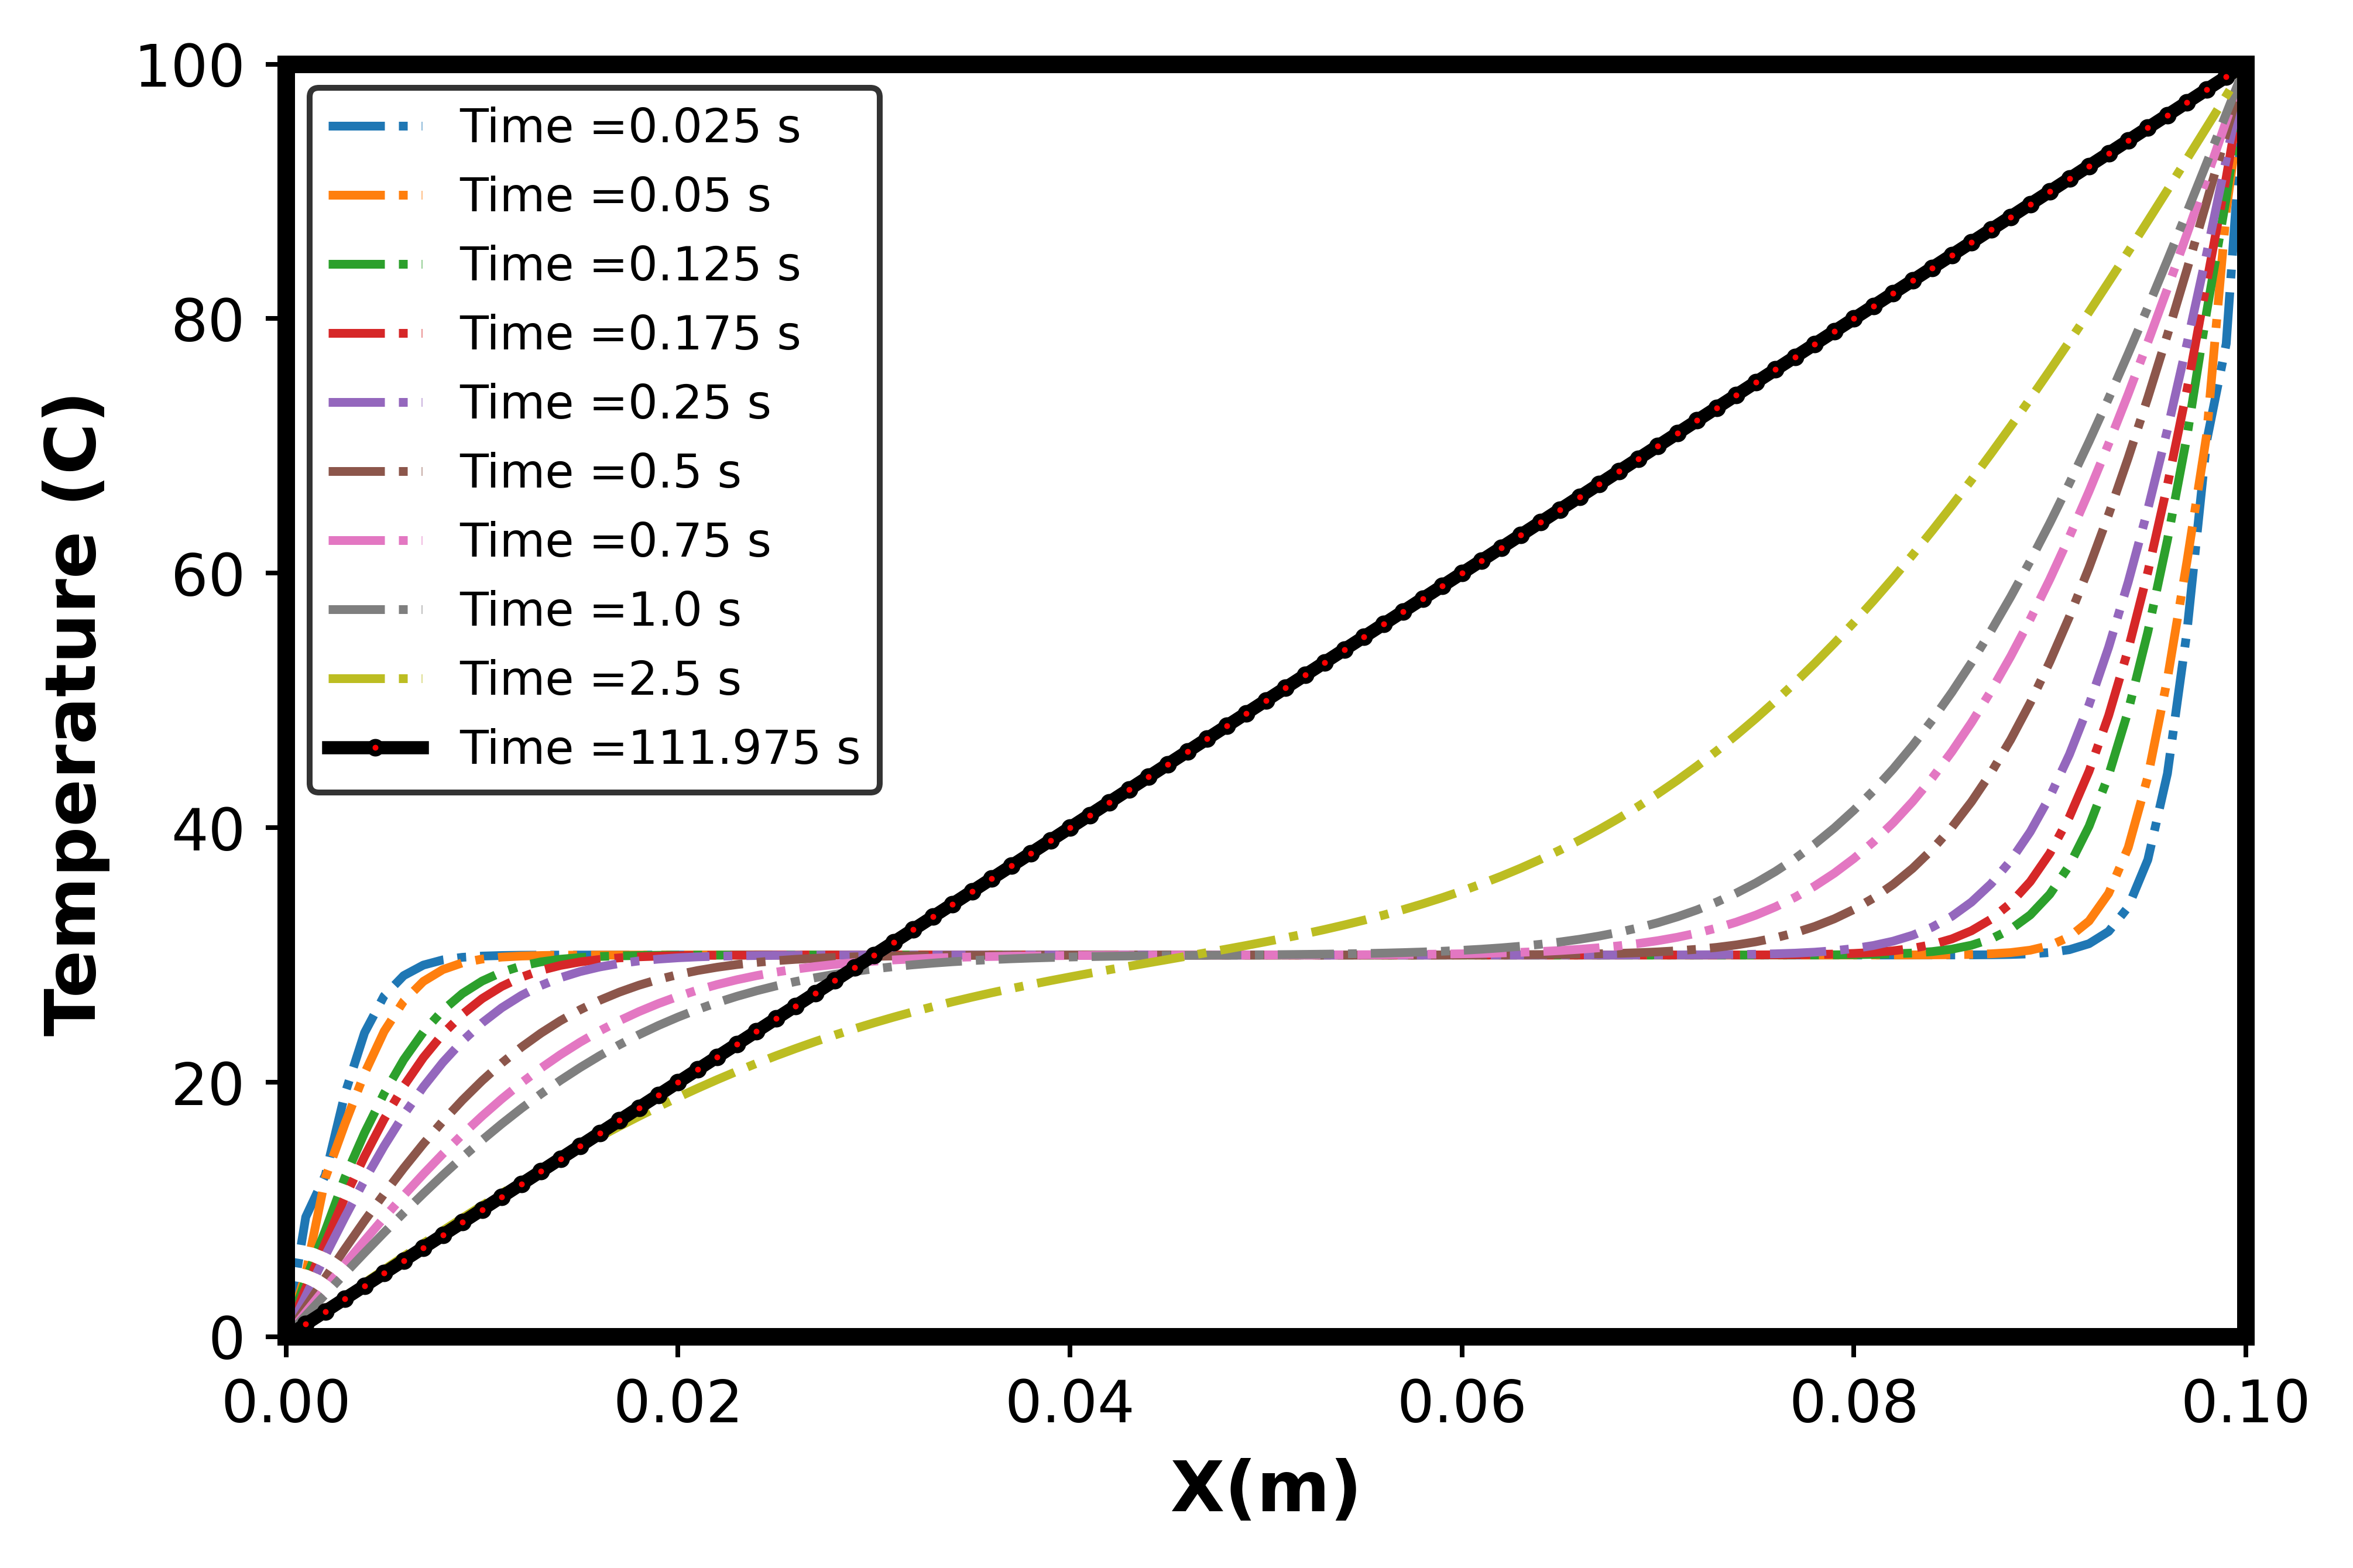

In [10]:
plt.figure(dpi=720)
#number of elements
n=101
#space between grid points
length=.1
dx=length/(n-1)
#thermal diffusivity
alpha=1e-4
#Boundary conditions
T_left=0
T_right=100
# initial condition
To=30
#Time step
dt=0.025
# weighting fasctor for scheme
f=0.5
#initialise the old and next time step values
T=np.ones((n,))*To
T[0]=T_left
T[n-1]=T_right
T_old=T.copy()
#matrix element --> for TDMA
b=np.ones((n-2,))*(1+f*2*alpha*dt/(dx*dx))
a=np.ones((n-3,))*(-1)*f*alpha*dt/(dx*dx)
c=np.ones((n-3,))*(-1)*f*alpha*dt/(dx*dx)
d=np.ones((n-2,))
# plot details
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X(m) ',fontsize=12,fontweight='bold')
plt.ylabel('Temperature (C) ',fontsize=12,fontweight='bold')
plt.xlim(left=0,right=length)
plt.ylim(bottom=T_left,top=T_right)
plot_time_loop=[0.2,0.5,1,2,5,7,10,20,30,40,100]
#initial time
t=0.0
#for convergence
error=1
loop=int(0)
while(error>1e-6):

    for i in range(0,n-2):
        d[i]=T_old[i+1]+alpha*(1-f)*(dt/pow(dx,2))*(T_old[i+2]-2*T_old[i+1]+T_old[i])
        if i==0:
            d[i]=d[i]+alpha*(f)*(dt/pow(dx,2))*T_left
        if i==(n-3):
            d[i]=d[i]+alpha*(f)*(dt/pow(dx,2))*T_right
    T[1:n-1,]=solver_TDMA(a,b,c,d)
    error=max(abs(T-T_old))
    T_old=T.copy()
    if(loop in plot_time_loop):
        y=np.linspace(0,length,n)
        plt.plot(y,T,label="Time ="+str(round(t,3))+' s',linestyle='-.',linewidth=1.5)
    t=t+dt
    loop=loop+int(1)
y=np.linspace(0,length,n)
plt.plot(y,T,label="Time ="+str(round(t,3))+' s',linewidth=2.25,color='black',marker='o',markerfacecolor='red',markersize='2')
plt.legend(edgecolor='black',loc='best',fontsize=8)
#plt.arrow(x=.05,y=20,dx=-0.01,dy=20,head_width=.001,ec='black')
del(plot_time_loop,a,b,c,d,t,T,T_old,loop)

## Implicit

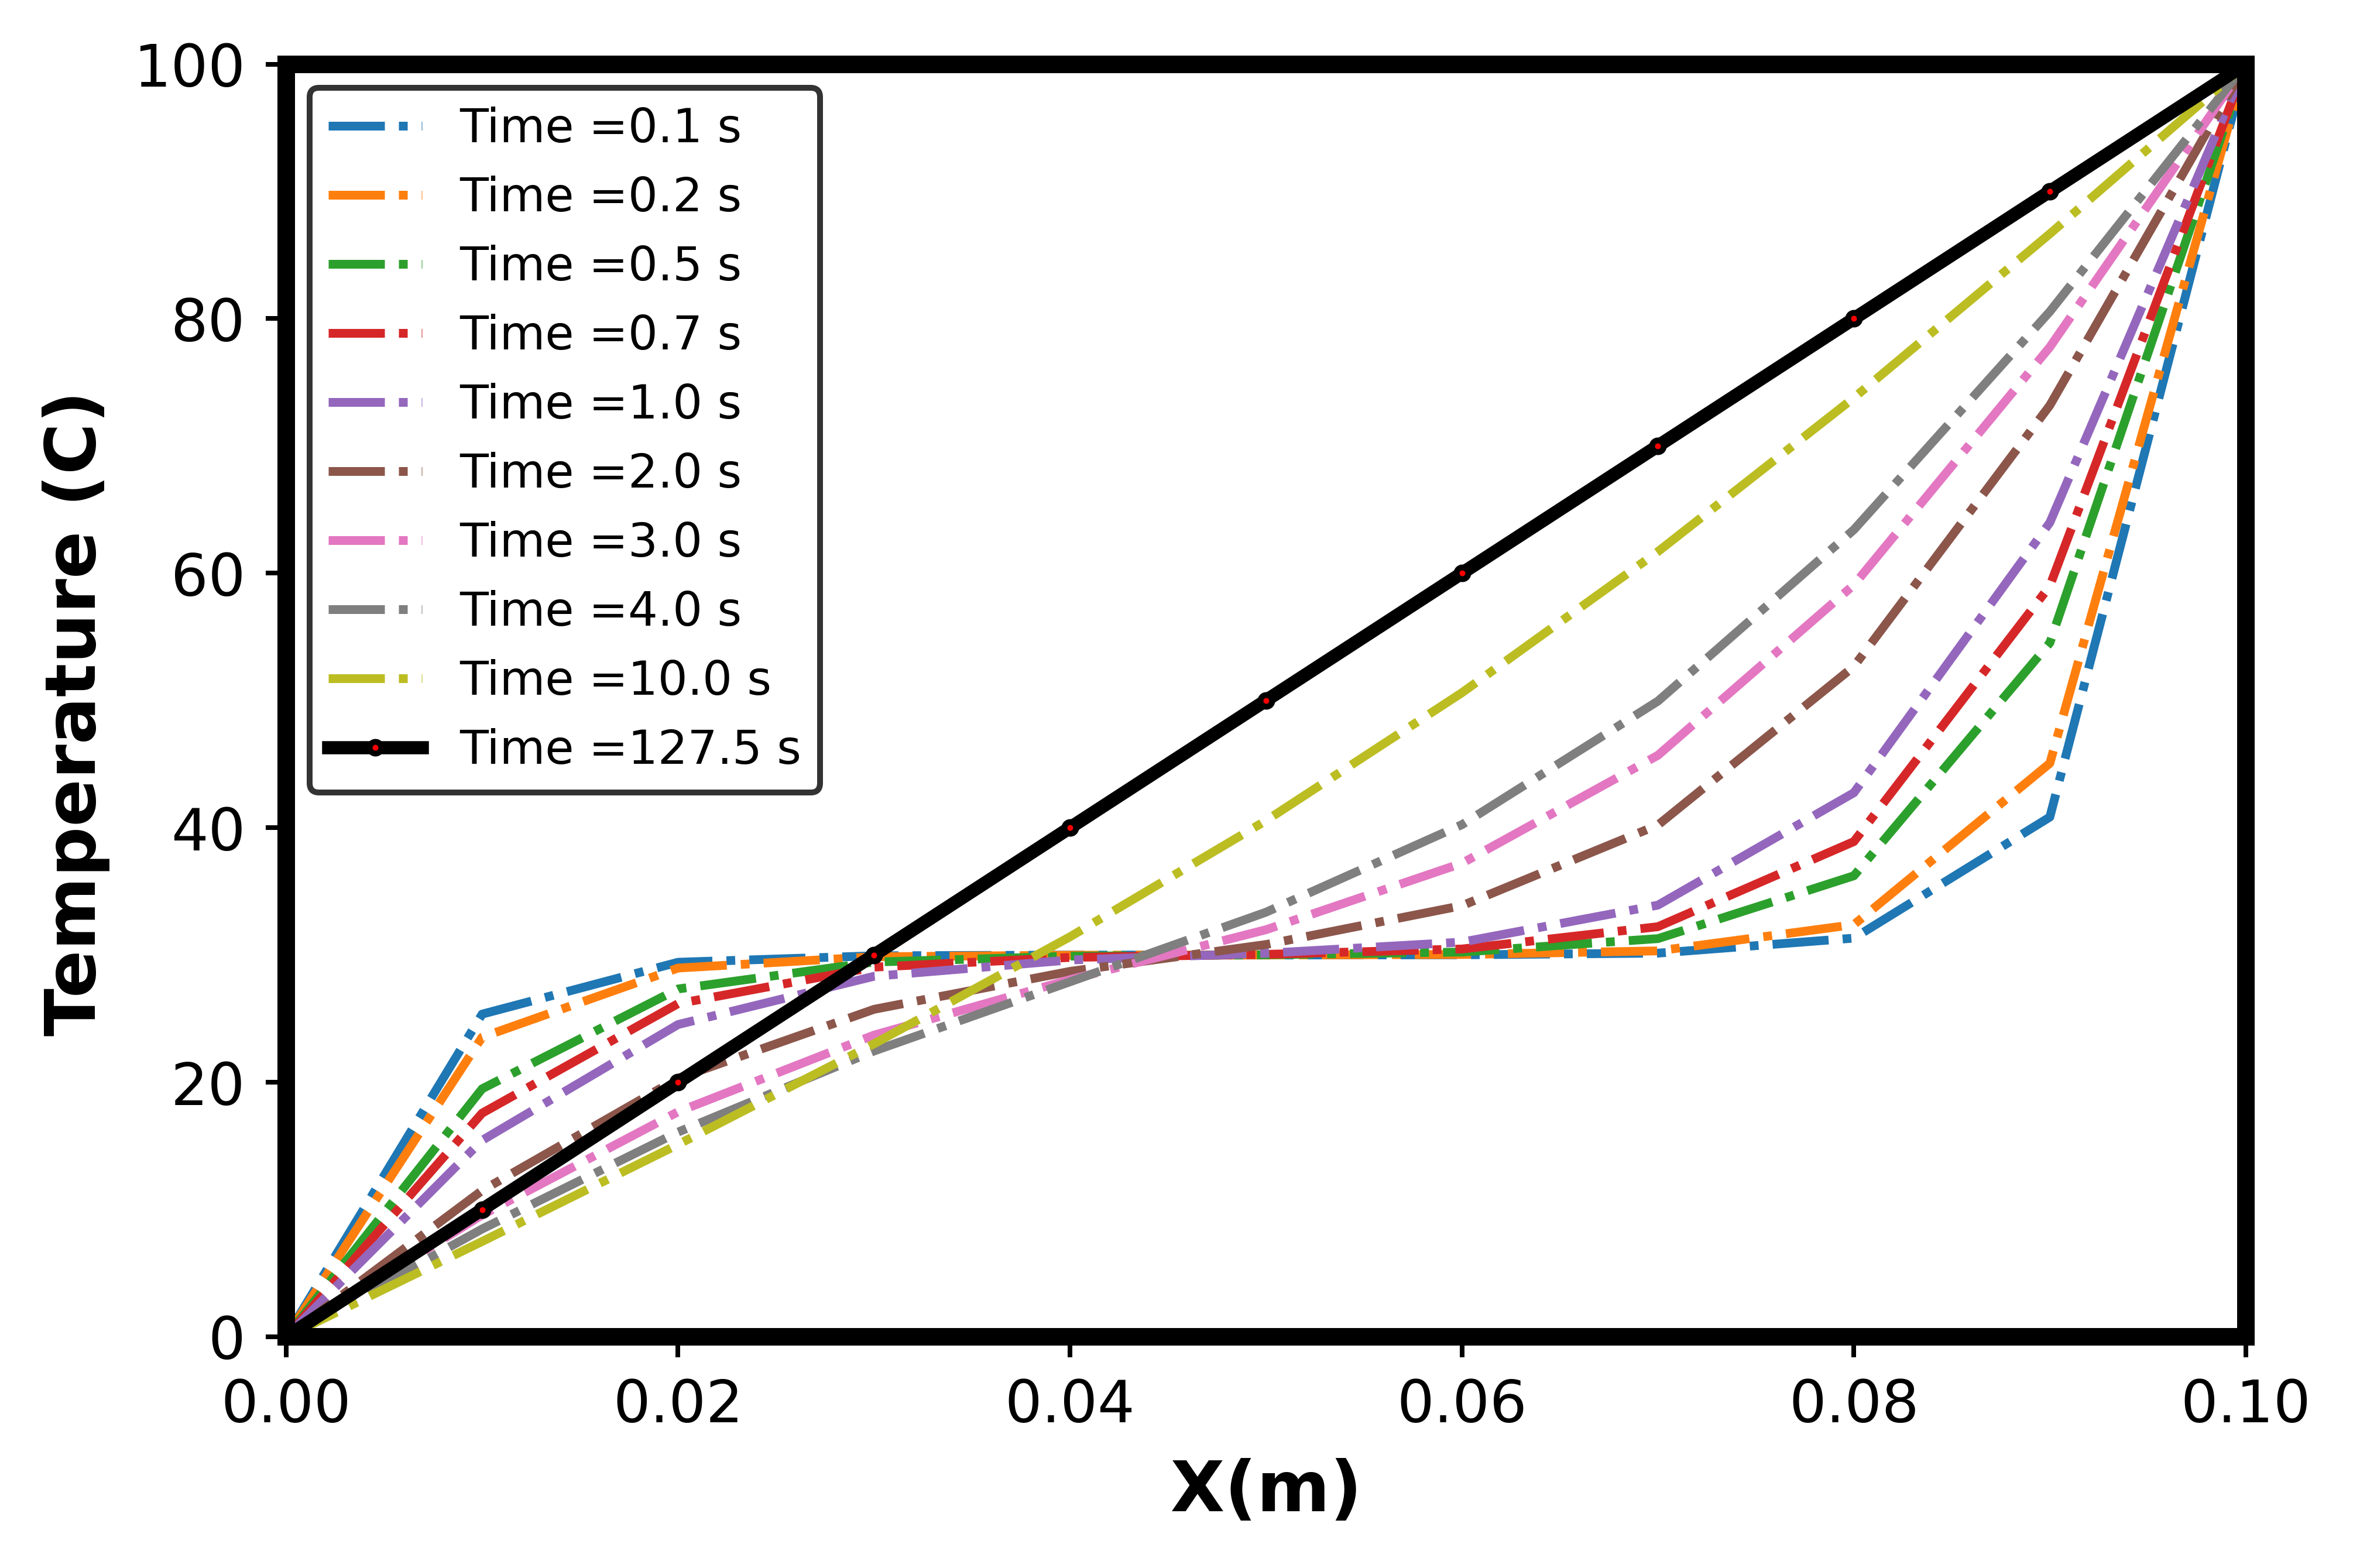

In [5]:
plt.figure(dpi=720)
#number of elements
n=11
#space between grid points
length=.1
dx=length/(n-1)
#thermal diffusivity
alpha=1e-4
#Boundary conditions
T_left=0
T_right=100
# initial condition
To=30
#Time step
dt=0.1
# weighting fasctor for scheme
f=1
#initialise the old and next time step values
T=np.ones((n,))*To
T[0]=T_left
T[n-1]=T_right
T_old=T.copy()
#matrix element --> for TDMA
b=np.ones((n-2,))*(1+f*2*alpha*dt/(dx*dx))
a=np.ones((n-3,))*(-1)*f*alpha*dt/(dx*dx)
c=np.ones((n-3,))*(-1)*f*alpha*dt/(dx*dx)
d=np.ones((n-2,))
# plot details
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X(m) ',fontsize=12,fontweight='bold')
plt.ylabel('Temperature (C) ',fontsize=12,fontweight='bold')
plt.xlim(left=0,right=length)
plt.ylim(bottom=T_left,top=T_right)
plot_time_loop=[0.2,0.5,1,2,5,7,10,20,30,40,100]
#initial time
t=0.0
#for convergence
error=1
loop=int(0)
while(error>1e-6):

    for i in range(0,n-2):
        d[i]=T_old[i+1]+alpha*(1-f)*(dt/pow(dx,2))*(T_old[i+2]-2*T_old[i+1]+T_old[i])
        if i==0:
            d[i]=d[i]+alpha*(f)*(dt/pow(dx,2))*T_left
        if i==(n-3):
            d[i]=d[i]+alpha*(f)*(dt/pow(dx,2))*T_right
    T[1:n-1,]=solver_TDMA(a,b,c,d)
    error=max(abs(T-T_old))
    T_old=T.copy()
    if(loop in plot_time_loop):
        y=np.linspace(0,length,n)
        plt.plot(y,T,label="Time ="+str(round(t,3))+' s',linestyle='-.',linewidth=1.5)
    t=t+dt
    loop=loop+int(1)
y=np.linspace(0,length,n)
plt.plot(y,T,label="Time ="+str(round(t,3))+' s',linewidth=2.25,color='black',marker='o',markerfacecolor='red',markersize='2')
plt.legend(edgecolor='black',loc='best',fontsize=8)
#plt.arrow(x=.05,y=20,dx=-0.01,dy=20,head_width=.001,ec='black')
del(plot_time_loop,a,b,c,d,t,T,T_old,loop)

## EXplicit


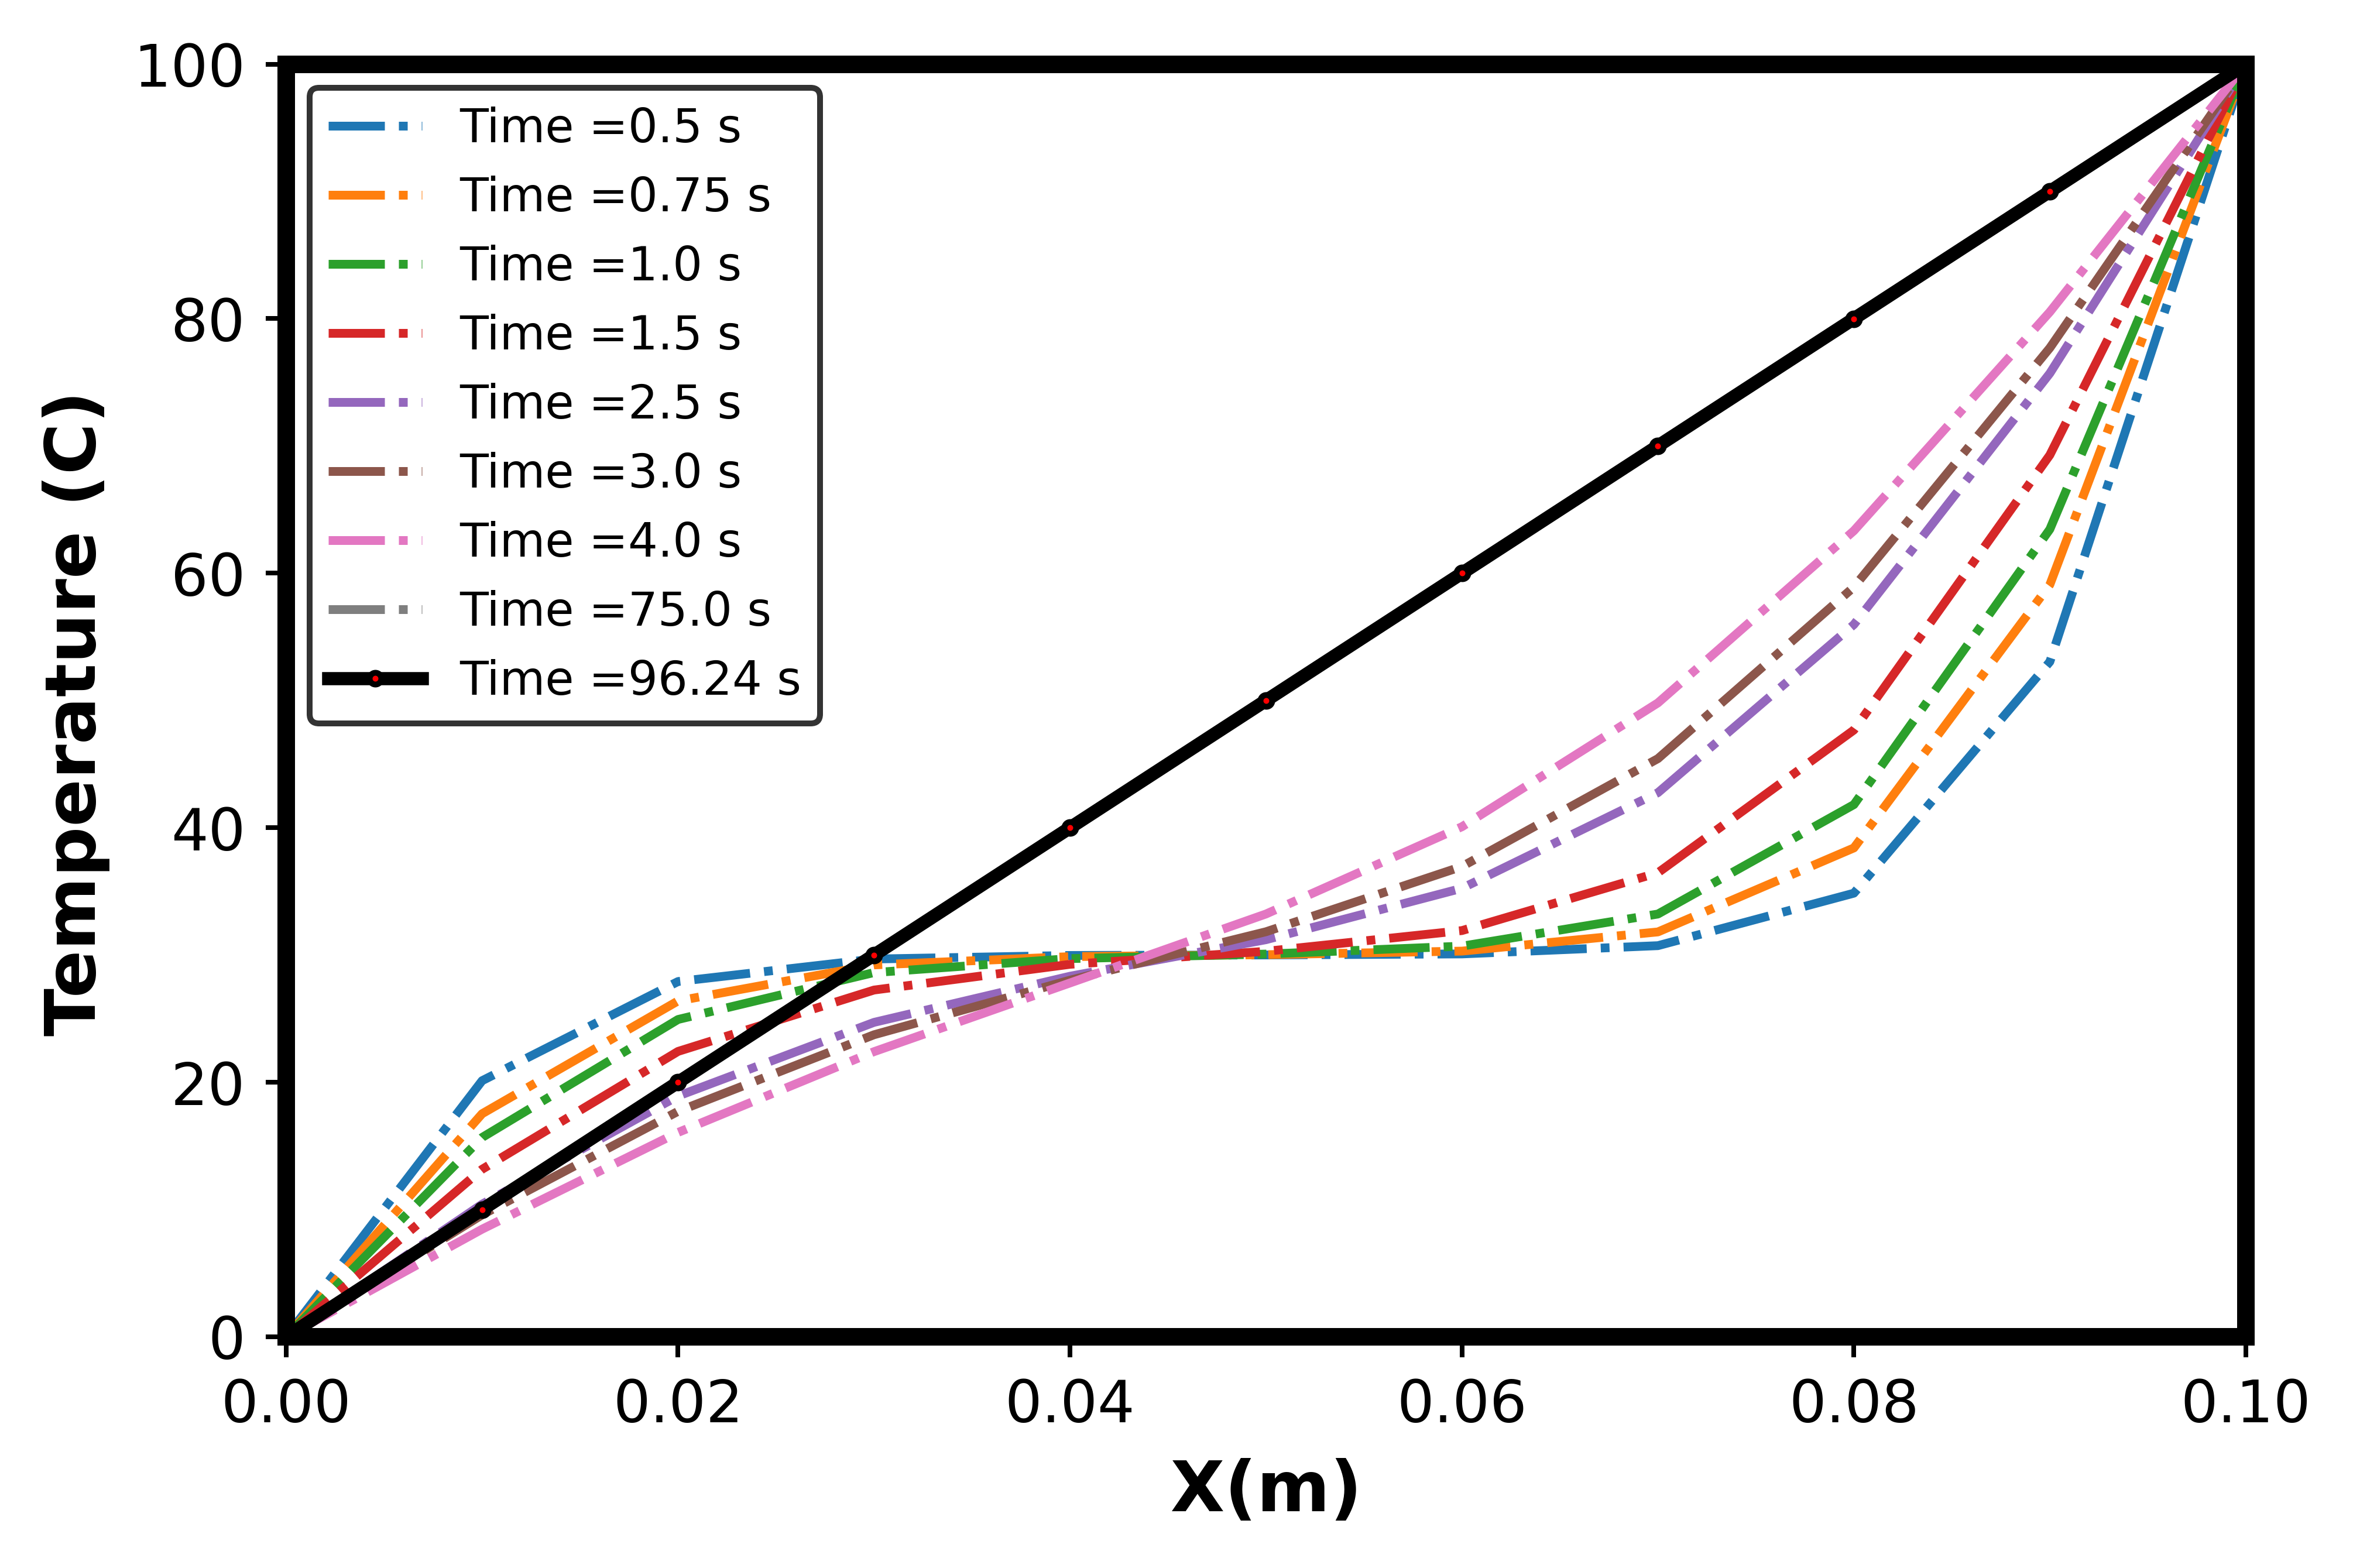

In [6]:
plt.figure(dpi=720)
#number of elements
n=11
#space between grid points
length=.1
dx=length/(n-1)
#thermal diffusivity
alpha=1e-4
#Boundary conditions
T_left=0
T_right=100
# initial condition
To=30
#Time step
dt=0.005
# weighting fasctor for scheme
f=0
#initialise the old and next time step values
T=np.ones((n,))*To
T[0]=T_left
T[n-1]=T_right
T_old=T.copy()
#matrix element --> for TDMA
b=np.ones((n-2,))*(1+f*2*alpha*dt/(dx*dx))
a=np.ones((n-3,))*(-1)*f*alpha*dt/(dx*dx)
c=np.ones((n-3,))*(-1)*f*alpha*dt/(dx*dx)
d=np.ones((n-2,))
# plot details
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X(m) ',fontsize=12,fontweight='bold')
plt.ylabel('Temperature (C) ',fontsize=12,fontweight='bold')
plt.xlim(left=0,right=length)
plt.ylim(bottom=T_left,top=T_right)
plot_time_loop=[0.2,0.5,100,150,200,300,500,600,800,15000]
#initial time
t=0.0
#for convergence
error=1
loop=int(0)
while(error>1e-6):

    for i in range(0,n-2):
        d[i]=T_old[i+1]+alpha*(1-f)*(dt/pow(dx,2))*(T_old[i+2]-2*T_old[i+1]+T_old[i])
        if i==0:
            d[i]=d[i]+alpha*(f)*(dt/pow(dx,2))*T_left
        if i==(n-3):
            d[i]=d[i]+alpha*(f)*(dt/pow(dx,2))*T_right
    T[1:n-1,]=solver_TDMA(a,b,c,d)
    error=max(abs(T-T_old))
    T_old=T.copy()
    if(loop in plot_time_loop):
        y=np.linspace(0,length,n)
        plt.plot(y,T,label="Time ="+str(round(t,3))+' s',linestyle='-.',linewidth=1.5)
    t=t+dt
    loop=loop+int(1)
y=np.linspace(0,length,n)
plt.plot(y,T,label="Time ="+str(round(t,3))+' s',linewidth=2.25,color='black',marker='o',markerfacecolor='red',markersize='2')
plt.legend(edgecolor='black',loc='best',fontsize=8)
#plt.arrow(x=.05,y=20,dx=-0.01,dy=20,head_width=.001,ec='black')
del(plot_time_loop,a,b,c,d,t,T,T_old,loop)

In [46]:
t
t+dt #floating point error coming and thus not plotting data at specified interval
str(t)

'10000.000000018848'

In [47]:
isinstance(plot_time,list)
float(plot_time[0])
type(t)

float

In [66]:
for i in range(0,4):
    print(i)

0
1
2
3


# Project 3

## Alternate Direct Implicit

In [10]:
#geometry and number of nodes
nx=40
ny=50
width=0.3
lenght=0.2
dx=lenght/(nx-1)
dy=width/(ny-1)
r=pow(dx,2)/pow(dy,2)
#BC and initial condition
T_left=20
T_right=20
T_up=100
T_down=20
T_initial=0

#initializing
T=np.ones((ny,nx))*T_initial
# j-->nx; i_>ny
T[0,:]=T_up
T[:,0]=T_left
T[:,nx-1]=T_right
T[ny-1,:]=T_down
df=pd.DataFrame(T)

T_old=T.copy()
error=1.0
itter=0

while(error>1e-6):
    # y sweep
    b=np.ones((ny-2,))*(-2.0)*(1+r)
    a=np.ones((ny-3,))*r
    c=np.ones((ny-3,))*r
    d=np.zeros((ny-2,))

    for j in range(1,nx-1):
        #d[0:ny-2]=(-1)*(T[0:ny-2,j]+T[2:ny,j])
        d[0:ny-2]=(-1)*(T[1:ny-1,j-1]+T[1:ny-1,j+1])
        d[0]=d[0]-r*T[0,j]#Top
        d[ny-3]=d[ny-3]-r*T[ny-1,j]
        T[1:ny-1,j]=solver_TDMA(a,b,c,d) 
      
    #x-sweep
    del(a,b,c,d)
    b=np.ones((nx-2,))*(-2.0)*(1+r)
    a=np.ones((nx-3,))*r
    c=np.ones((nx-3,))*r
    d=np.zeros((nx-2,))
    for i in range(1,ny-1):
        d[0:nx-2]=(-1)*(T[i+1,1:nx-1]+T[i-1,1:nx-1])
        d[0]=d[0]-r*T[i,0]#left
        d[nx-3]=d[nx-3]-r*T[i,nx-1]
        T[i,1:nx-1]=solver_TDMA(a,b,c,d)  
    del(a,b,c,d)
    error=np.amax(np.abs(T-T_old))
    itter=itter+1
    T_old=T.copy()





In [11]:
itter

770

In [57]:
df=pd.DataFrame(T)


<AxesSubplot:>

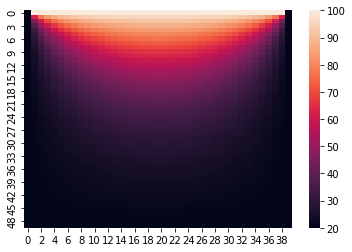

In [72]:
sns.heatmap(T)

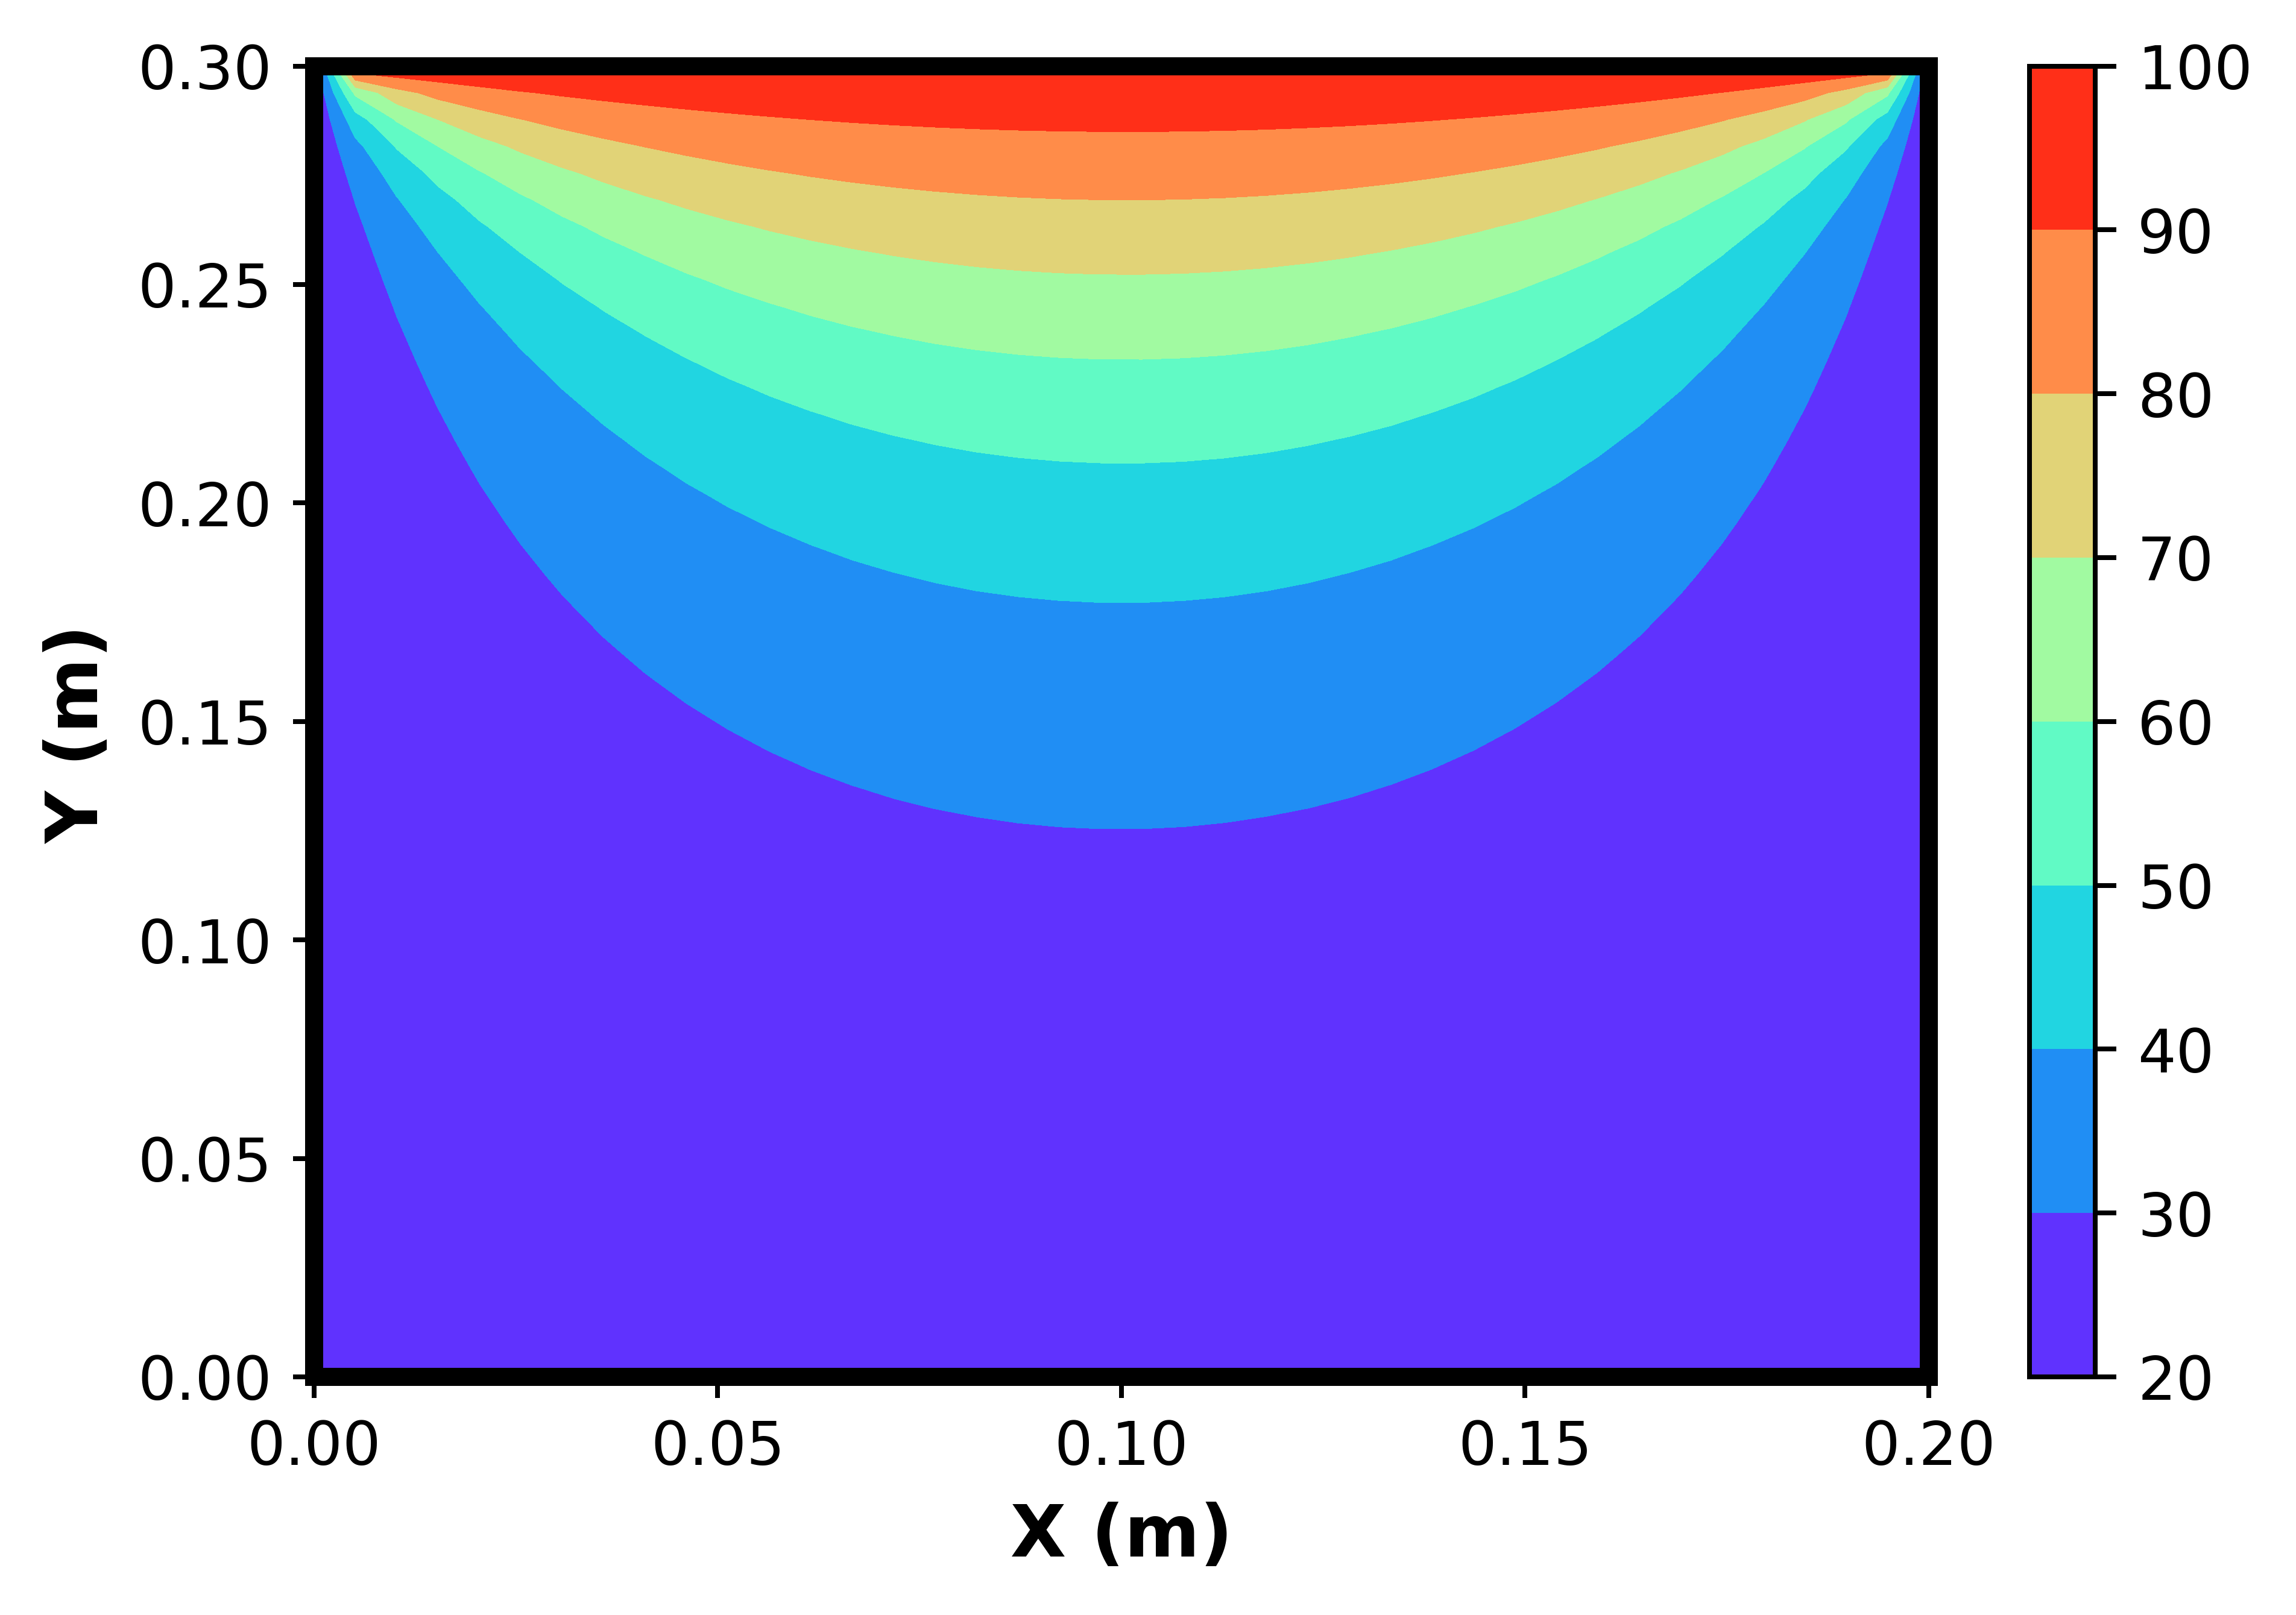

In [5]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
plt.xticks(np.linspace(0,lenght,5))
x,y = np.meshgrid(np.linspace(0,lenght, nx), np.linspace(width,0, ny))
plt.contourf(x,y,T, 8, alpha=1, cmap='rainbow')
plt.colorbar()

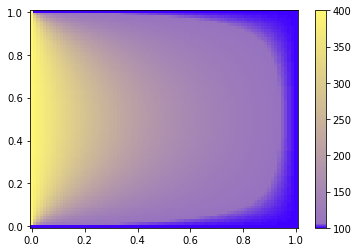

In [51]:
cdict = {
  'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
  'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
  'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
}
cm1 = m.colors.LinearSegmentedColormap('my_colormap', cdict, 1024)

plt.pcolor(x,y, T, cmap=cm1)
plt.colorbar()

In [35]:
y

array([[0.3       , 0.3       , 0.3       , ..., 0.3       , 0.3       ,
        0.3       ],
       [0.29620253, 0.29620253, 0.29620253, ..., 0.29620253, 0.29620253,
        0.29620253],
       [0.29240506, 0.29240506, 0.29240506, ..., 0.29240506, 0.29240506,
        0.29240506],
       ...,
       [0.00759494, 0.00759494, 0.00759494, ..., 0.00759494, 0.00759494,
        0.00759494],
       [0.00379747, 0.00379747, 0.00379747, ..., 0.00379747, 0.00379747,
        0.00379747],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


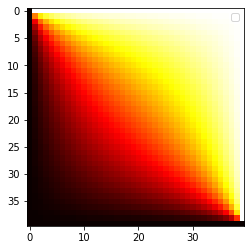

In [7]:
plt.imshow(T, cmap='hot', interpolation='nearest')
plt.legend()

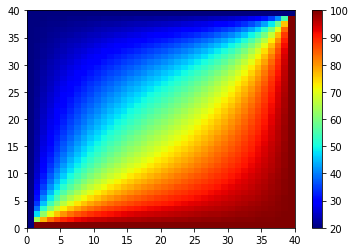

In [12]:
    plt.pcolormesh(T, cmap=plt.cm.jet, vmin=20, vmax=100,alpha=1)
    plt.colorbar()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


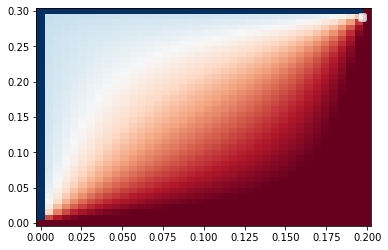

In [78]:
y, x = np.meshgrid(np.linspace(0, width, ny), np.linspace(0, lenght, nx))
plt.pcolormesh(x, y, T, cmap='RdBu', vmin=20, vmax=100)
plt.legend()

In [46]:
d[0:ny-2]=T[0:ny-2,1]+T[2:ny,1]
d


array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  20.])

In [16]:
l=np.ones((5,1))
l[3]=2
l[1]=6
l[0:4]
l[1][0]
l

array([[1.],
       [6.],
       [1.],
       [2.],
       [1.]])

In [9]:
s=np.ones((4,5))
s[3][4]=8
s

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 8.]])

In [44]:
l

array([1., 6., 1., 2., 1.])

## Gauss seidel point-wise

In [36]:
#geometry and number of nodes
nx=50
ny=50
width=0.3
lenght=0.2
dx=lenght/(nx-1)
dy=width/(ny-1)
r=pow(dx,2)/pow(dy,2)
#BC and initial condition
T_left=20
T_right=20
T_up=100
T_down=20
T_initial=40

#initializing
T=np.ones((ny,nx))*T_initial
# j-->nx; i_>ny
T[0,:]=T_up
T[:,0]=T_left
T[:,nx-1]=T_right
T[ny-1,:]=T_down
df=pd.DataFrame(T)

T_old=T.copy()
error=1.0
itter=0
l=0.5 # weighting factor
while(error>1e-6):
    for i in range(1,ny-1):
        for j in range(1,nx-1):
            T[i,j]=l*((T[i,j+1]+T[i,j-1])/(pow(dx,2)) + (T[i+1,j]+T[i-1,j])/(pow(dy,2)))/(2*(pow(1/dx,2)+pow(1/dy,2)))+(1-l)*T[i,j]
            '''T[i,j]=(T[i,j+1]+T[i,j-1])/(pow(dx,2)) + (T[i+1,j]+T[i-1,j])/(pow(dy,2))
            T[i,j]=T[i,j]/(2*(pow(1/dx,2)+pow(1/dy,2)))'''

    error=np.amax(np.abs(T-T_old))
    itter=itter+1
    T_old=T.copy()
itter

7133

In [9]:
itter

2040

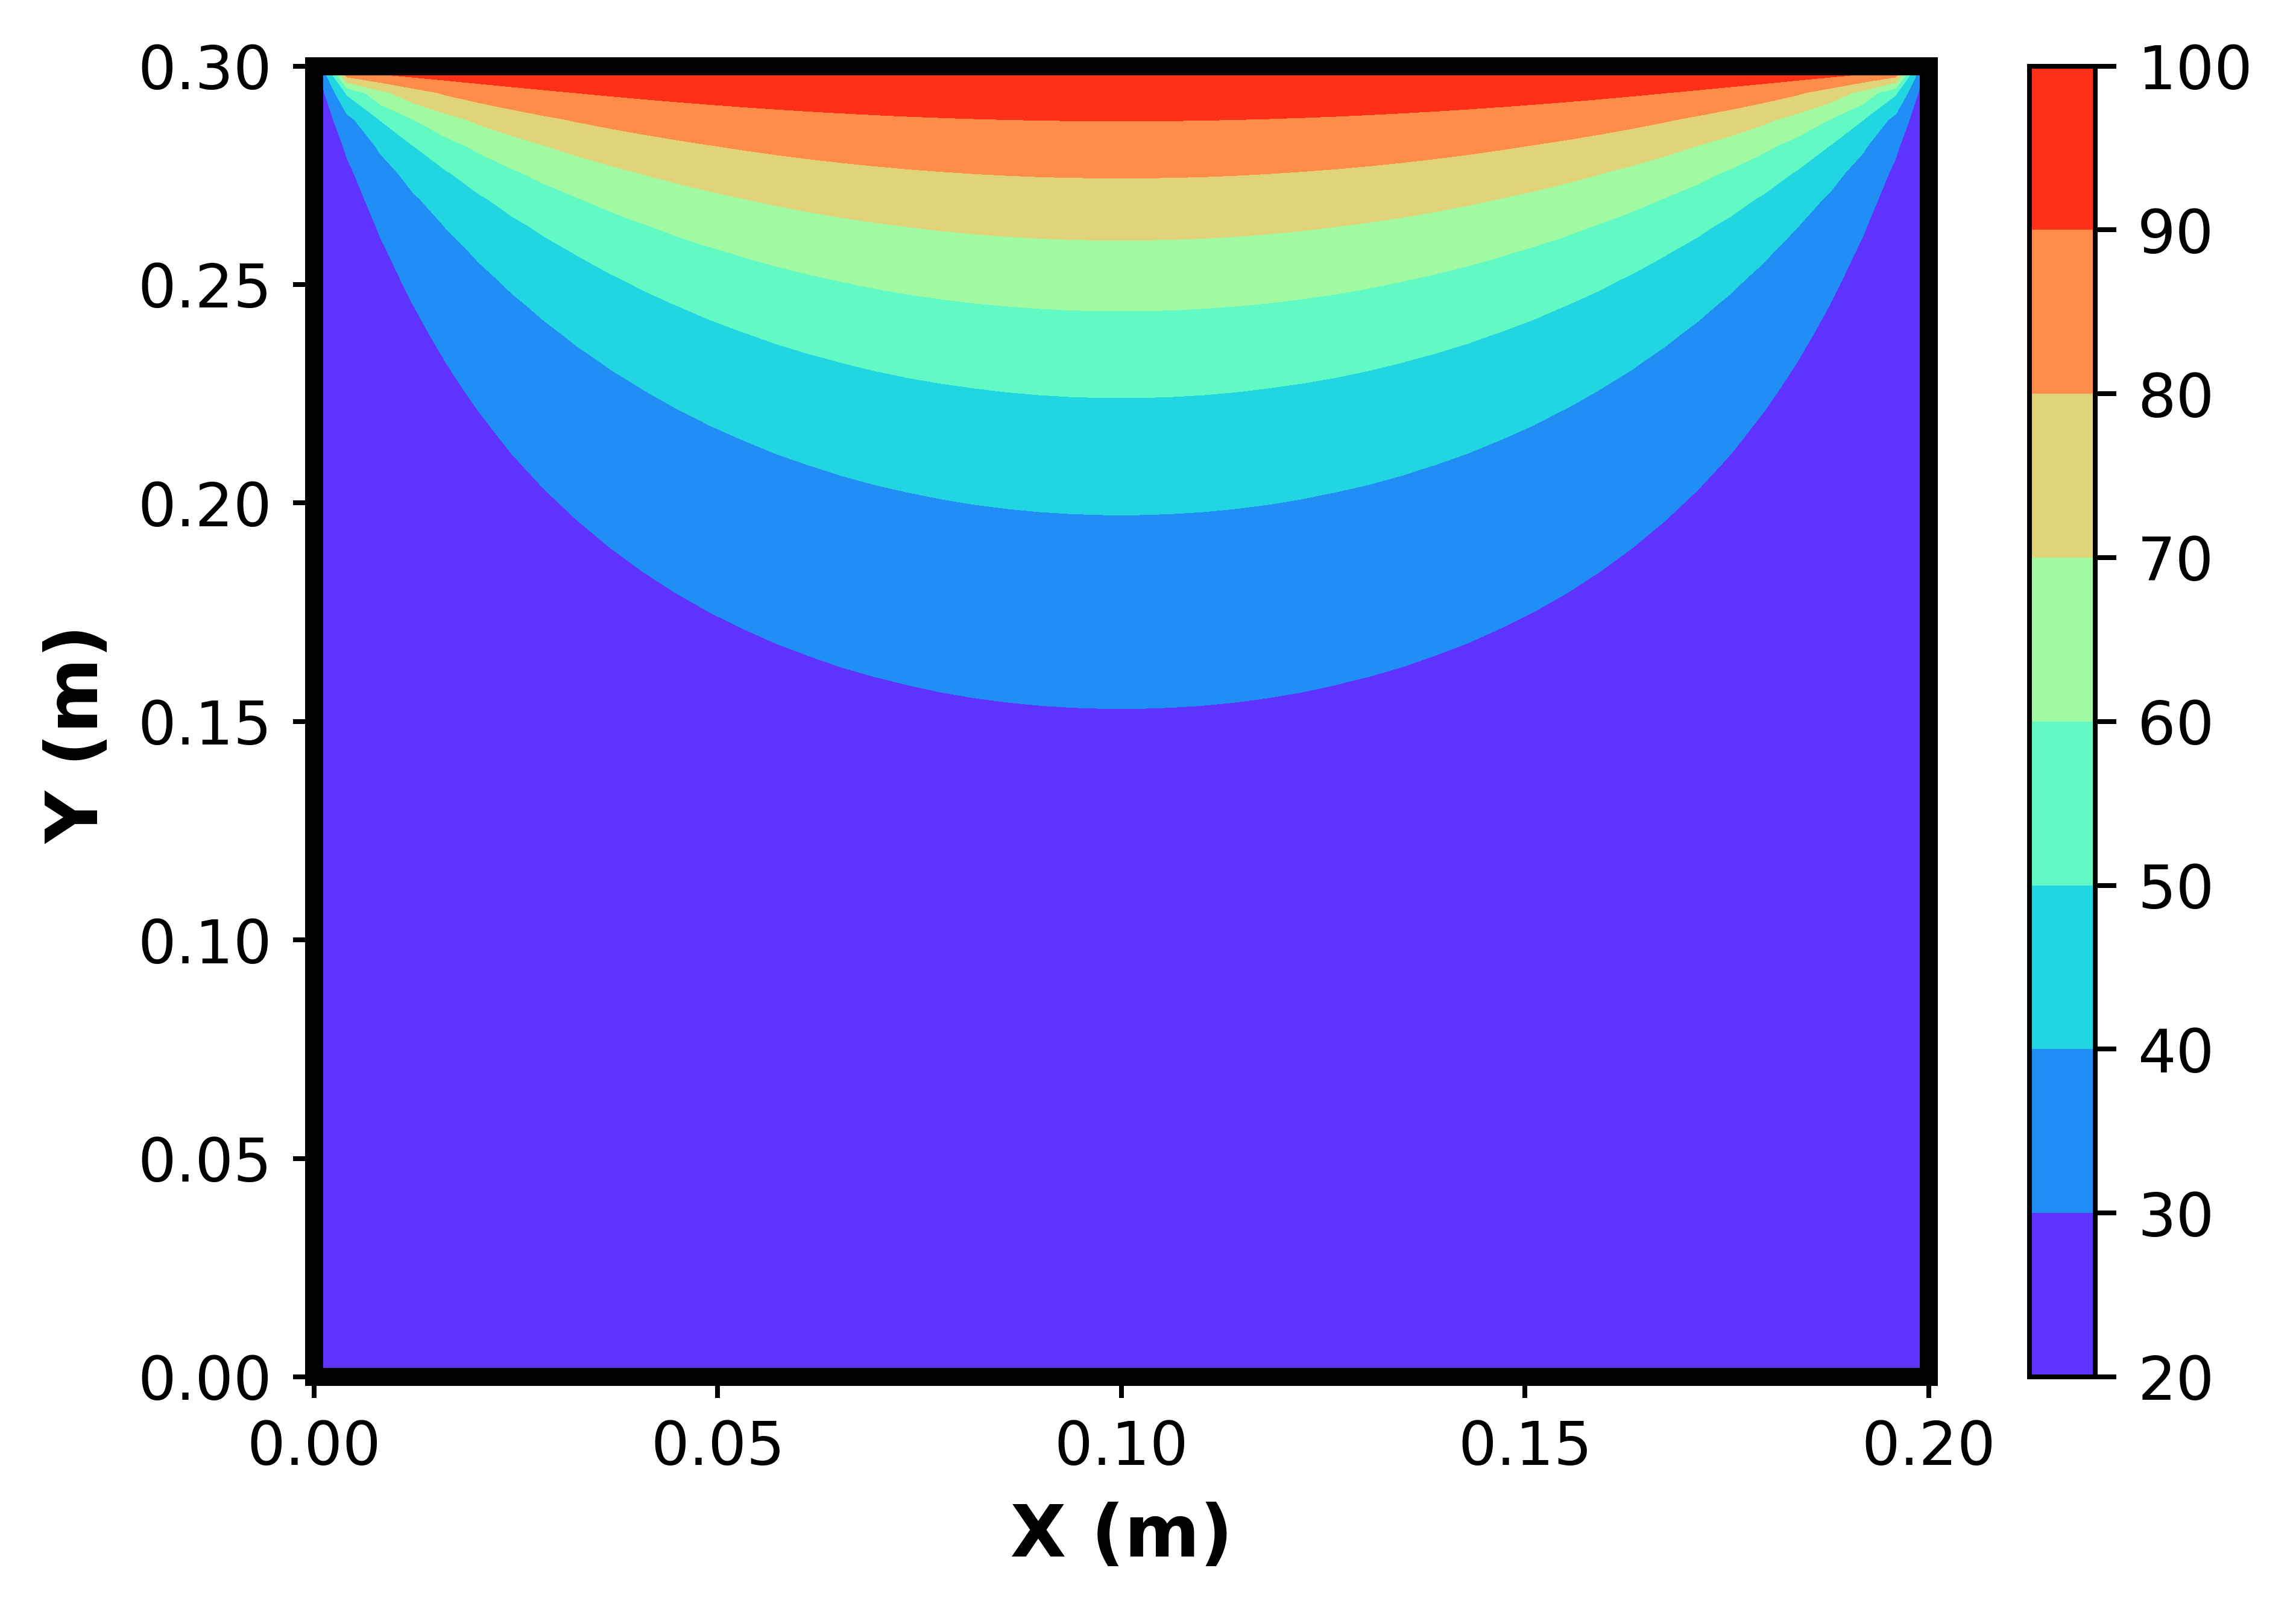

In [35]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
plt.xticks(np.linspace(0,lenght,5))
x,y = np.meshgrid(np.linspace(0,lenght, nx), np.linspace(width,0, ny))
plt.contourf(x,y,T, 8, alpha=1, cmap='rainbow')
plt.colorbar()

## Analytical solution

In [178]:
#analytical solution
X, Y = np.meshgrid(np.linspace(0,lenght,200),np.linspace(width,0,200))
T_analytical = sum(((np.sinh(n*np.pi*Y/lenght)/np.sinh(np.pi*n*width/lenght))*(2/(n*np.pi))*(pow(-1,n+1)+1)*np.sin(n*np.pi*X/lenght)) for n in range (1,150))
ak=1

In [26]:
#analytical solution
import warnings
X, Y = np.meshgrid(np.linspace(0,lenght,200,dtype=np.longdouble),np.linspace(width,0,200,dtype=np.longdouble))
warnings.filterwarnings('ignore')
T_analytical = sum(((np.exp(logsumexp(n*np.pi*Y/lenght)-logsumexp(-n*np.pi*Y/lenght),dtype='longdouble')/np.exp(logsumexp(np.pi*n*width/lenght)-logsumexp(-np.pi*n*width/lenght),dtype='longdouble'))*(2/(n*np.pi))*(pow(-1,n+1)+1)*np.sin(n*np.pi*X/lenght)) for n in range (1,250))
ak=1

In [24]:
X=X.astype('float128')
X.dtype

TypeError: data type 'float128' not understood

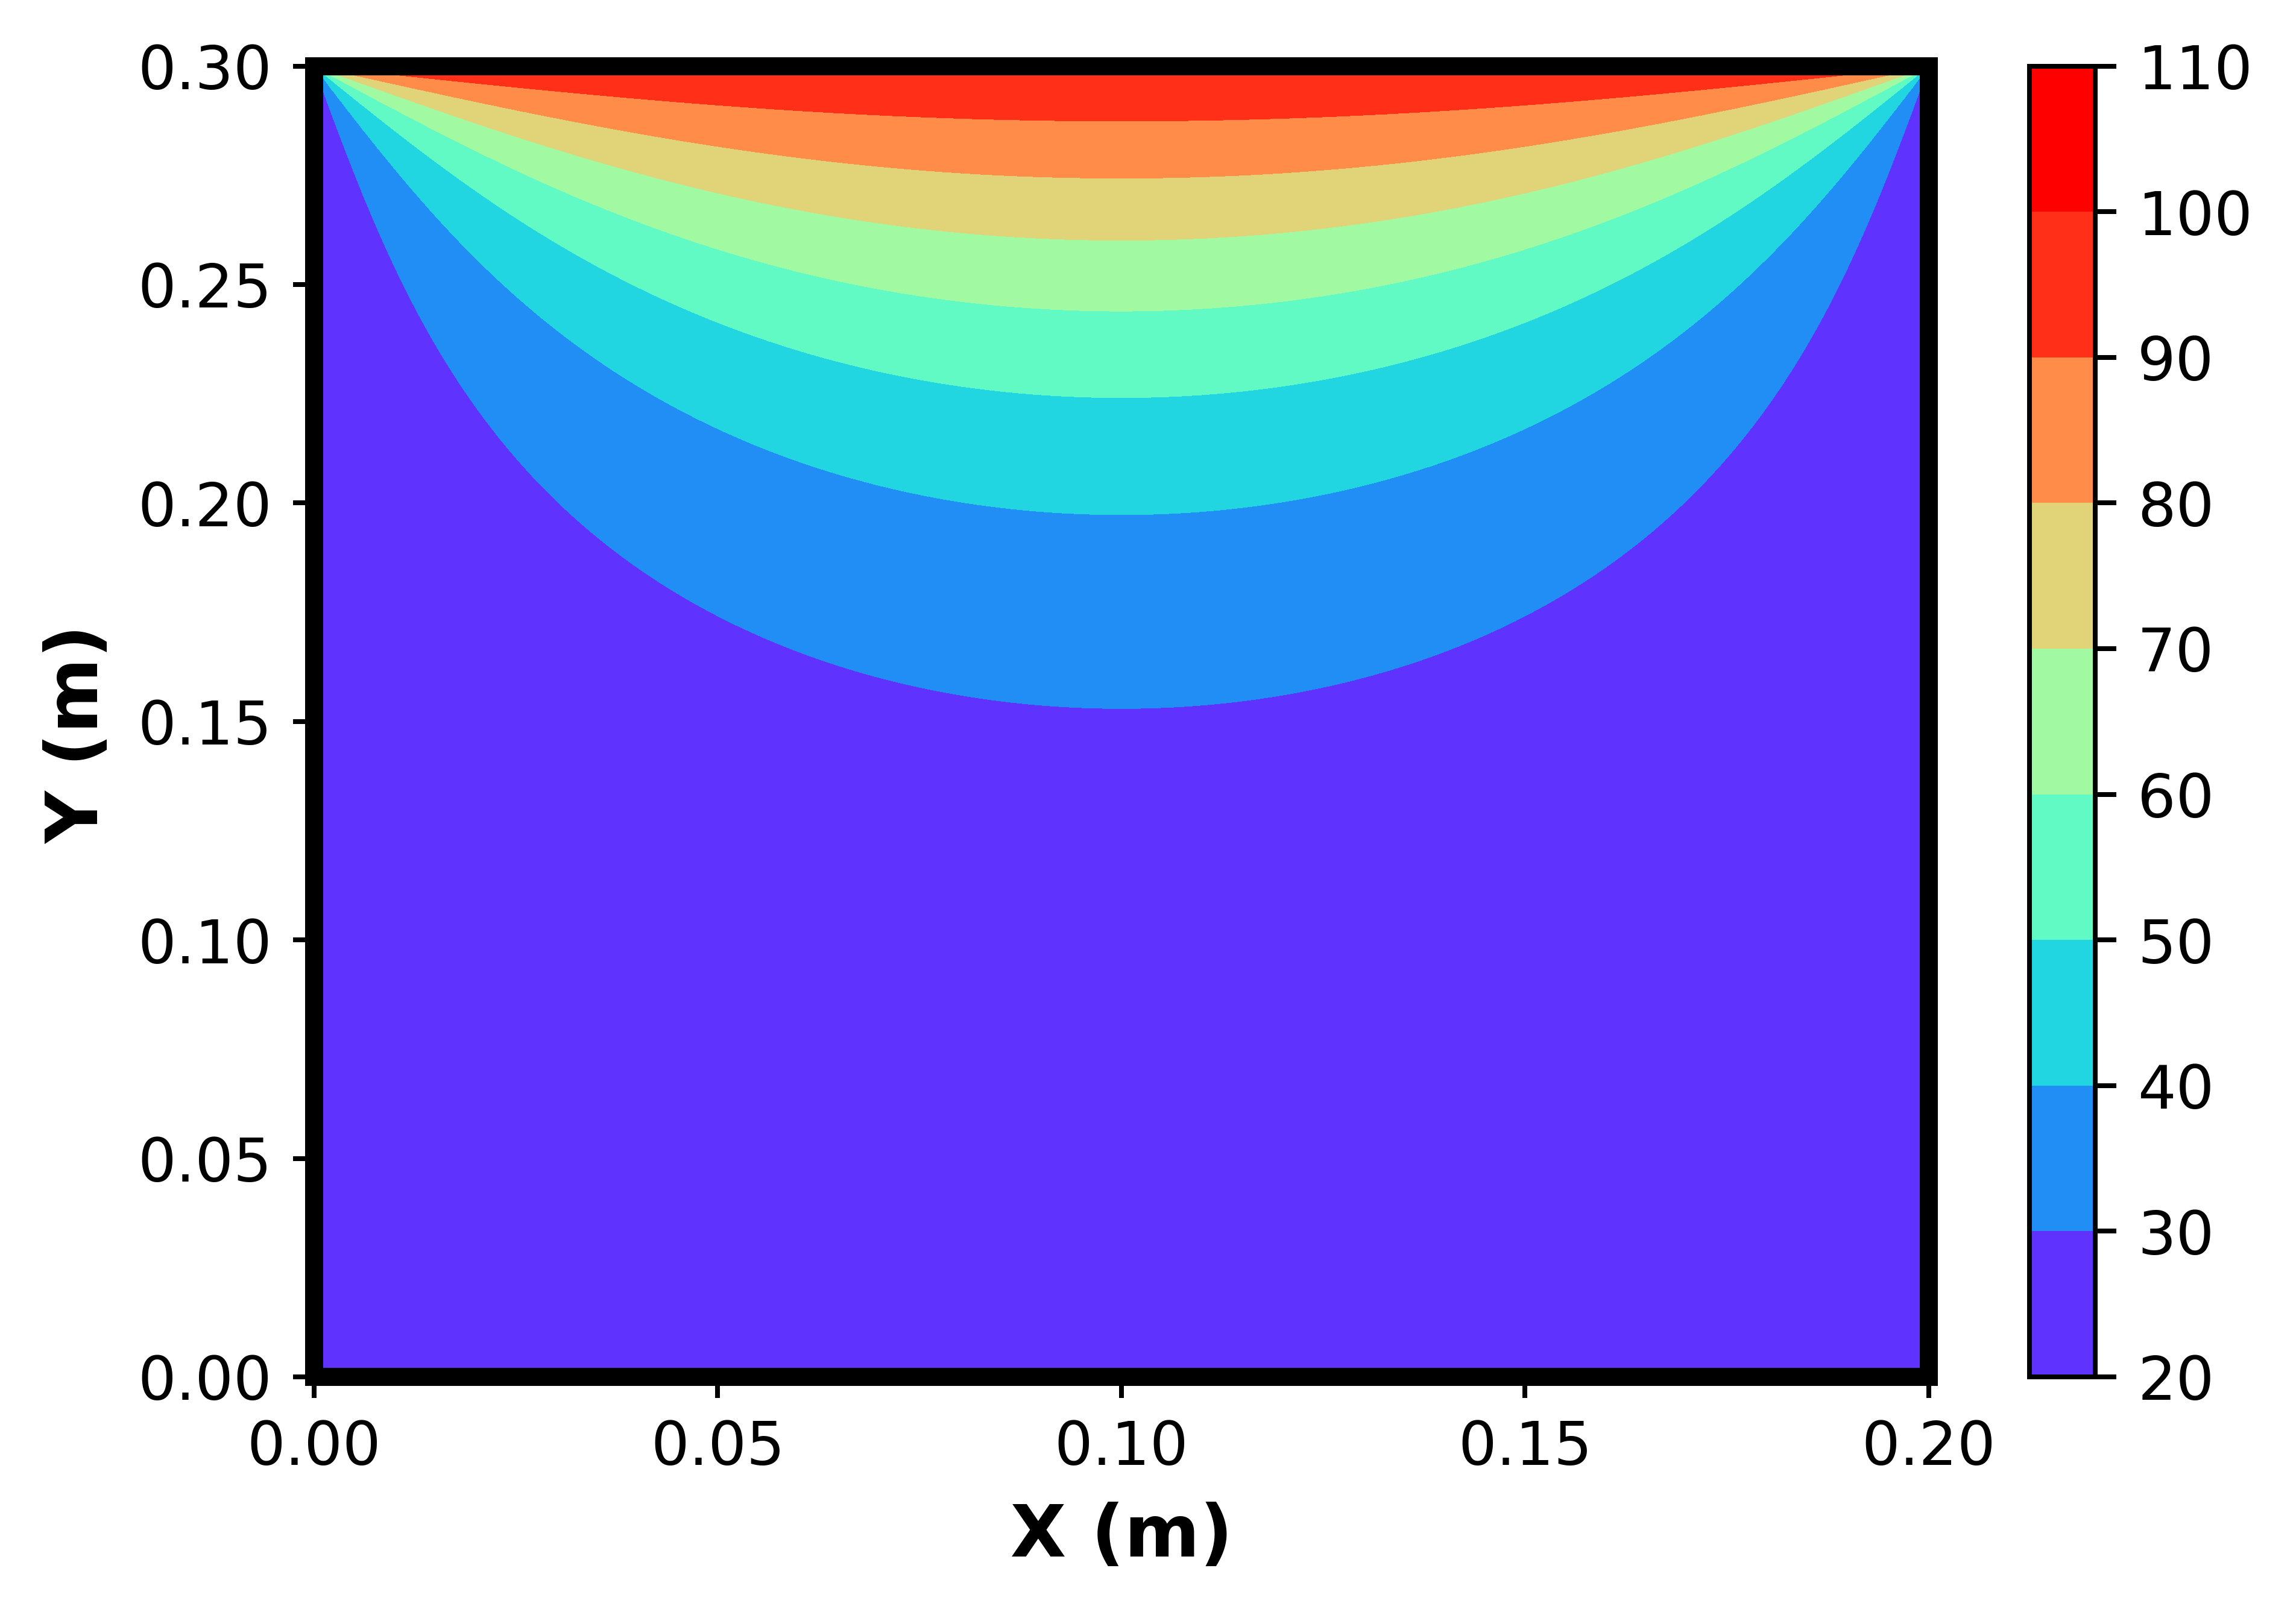

In [188]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
plt.xticks(np.linspace(0,lenght,5))
if ak==1:
    T_analytical=T_analytical*(100-20) + 20 
    ak=ak+1
plt.contourf(X,Y,T_analytical, 8, alpha=1, cmap='rainbow',vmin=20,vmax=100)
plt.clim(20,100)
plt.colorbar()

In [27]:
df=pd.DataFrame(T_analytical)
df

0    1    2    3    4    5    6    7    8    9    ...  190  191  192  \
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
195  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
196  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
197  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
198  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
199  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

     193  194  195  196  197  198  199  
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
..   ...  ...  ...  ...  ...  ...  ...  
195  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
196  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
197  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
198  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
199  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[200 rows x 200 columns]

In [28]:
x = 789
x = np.float128(x)
print(np.exp(x))

AttributeError: module 'numpy' has no attribute 'float128'

# Important use of copy function

In [48]:
a=[1,2,3,4]
b=a
a[0]=5
b

[5, 2, 3, 4]

# Project -4 

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0

In [44]:
def timestep(c,dx):
    dt=dx/c
    return dt

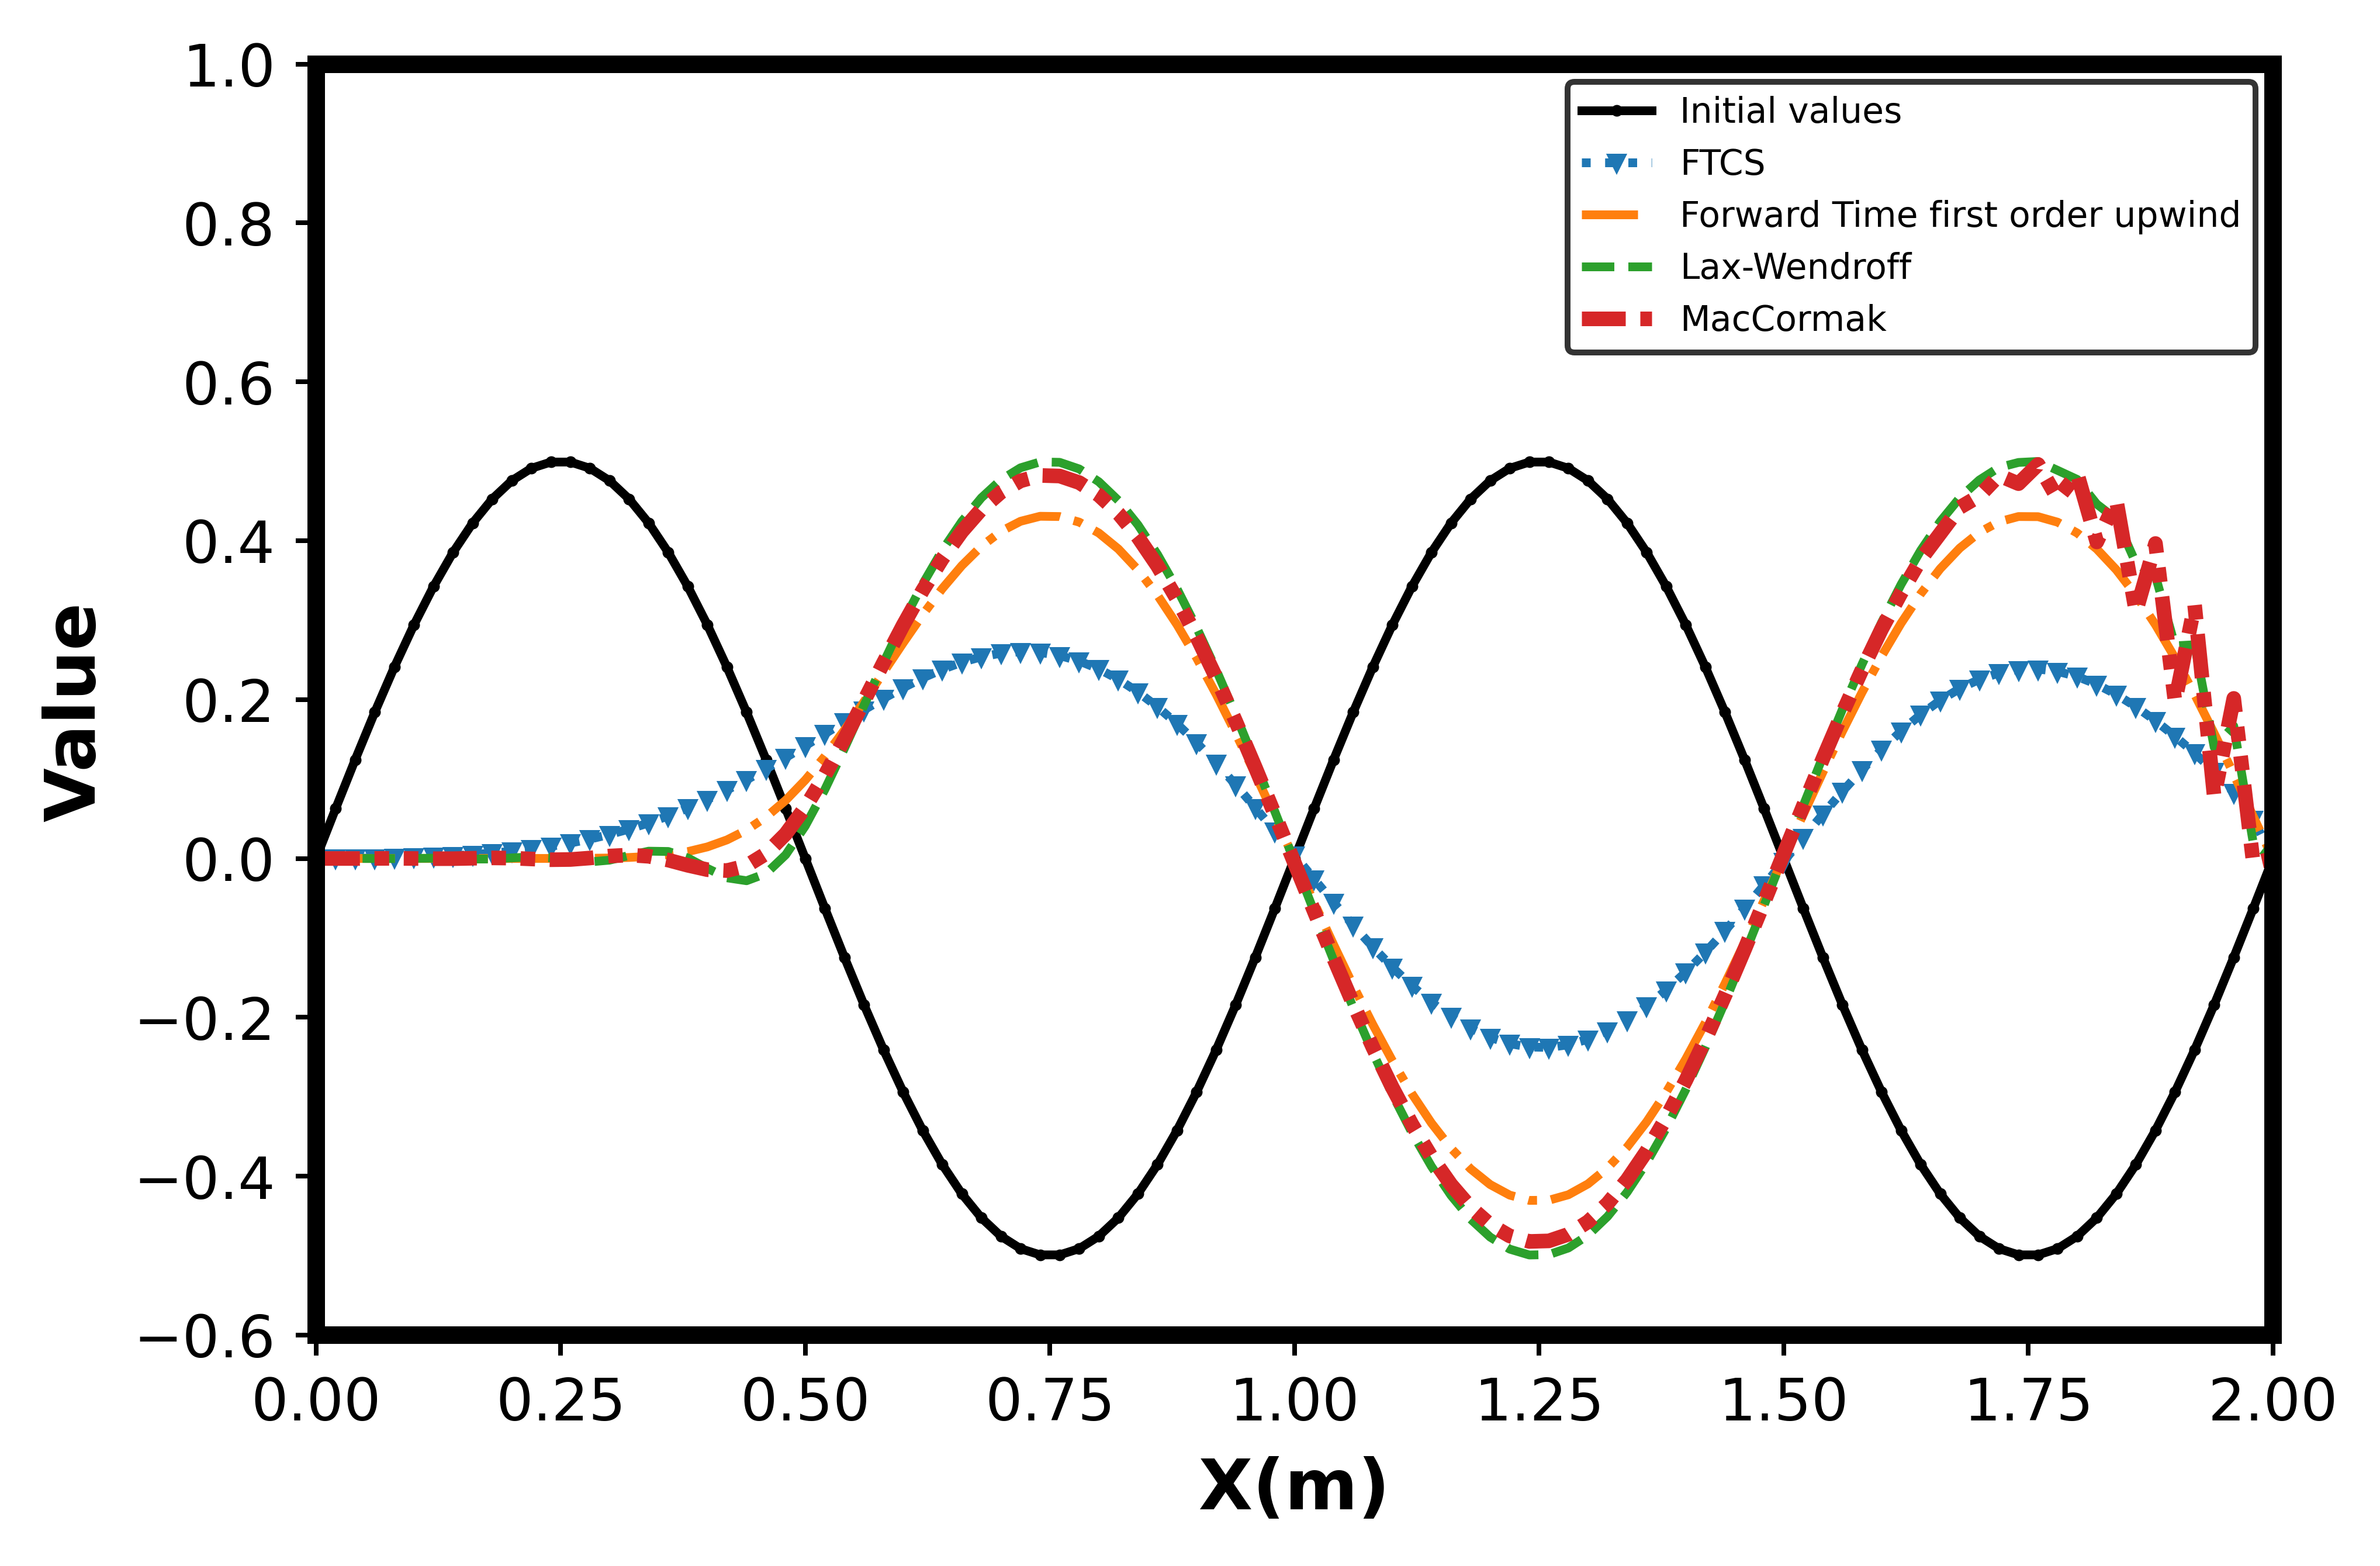

In [46]:
plt.figure(dpi=720)
length=2
nx=101
dx=1/(nx-1)
c=1 # speed
dt=0.25*timestep(c,dx)
u_initial = 0.5* np.sin(2*np.pi*np.linspace(0,length,nx))
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X(m) ',fontsize=12,fontweight='bold')
plt.ylabel('Value ',fontsize=12,fontweight='bold')
plt.xlim(left=0,right=length)
plt.ylim(bottom=-.6,top=1)
nt=100
plt.plot(np.linspace(0,length,nx),u_initial,label='Initial values',color='black',marker='o',markersize=1)
for l in ['FTCS','Forward Time first order upwind','Lax-Wendroff','MacCormak'] :

    u_old=u_initial.copy()
    u=u_old.copy()
    t=0
    if l == 'FTCS':
        while(t<nt):
            for i in range(1,nx-1):
                u[i]=(u_old[i+1]+u_old[i-1])/2 - c*(dt/dx)*0.5*(u_old[i+1]-u_old[i-1])
            u_old=u.copy()
            t=t+1
        plt.plot(np.linspace(0,length,nx),u,label=l,linestyle=':',linewidth=1.5,marker='v',markersize=2)
    if l== 'Forward Time first order upwind':
        while(t<nt):
            for i in range(1,nx-1):
                u[i]=u_old[i] - c*(dt/dx)*(u_old[i]-u_old[i-1])
            u_old=u.copy()
            t=t+1
        plt.plot(np.linspace(0,length,nx),u,label=l,linestyle='-.',linewidth=1.5)
    if l == 'Lax-Wendroff':
        while(t<nt):
            for i in range(1,nx-1):
                u[i]=u_old[i] - c*0.5*(dt/dx)*(u_old[i+1]-u_old[i-1])+0.5*pow(c*dt/dx,2)*(u_old[i+1]-2*u_old[i]+u_old[i-1])
            u_old=u.copy()
            t=t+1
        plt.plot(np.linspace(0,length,nx),u,label=l,linestyle='--',linewidth=1.5)
    if l == 'MacCormak':
        while(t<nt):
            for i in range(1,nx-1):
                #predictor
                u[i]=u_old[i] - c*(dt/dx)*(u_old[i+1]-u_old[i])
                #corrector
                u[i]=(u_old[i]+u[i])*0.5 - c*0.5*(dt/dx)*(u[i]-u[i-1])
            u_old=u.copy()
            t=t+1
        plt.plot(np.linspace(0,length,nx),u,label=l,linestyle=(0, (3, 1, 1, 1, 1, 1)),linewidth=2.5)


plt.legend(edgecolor='black',loc='upper right',fontsize=6)


$$ \frac{\partial u}{\partial t} + (\frac{1}{2}- u )\frac{\partial u}{\partial x}= 0.01 \frac{\partial^2 u}{\partial x^2}


In [4]:
def delta_t(u,dx,nu,c,b):
    ''' 0.000001 so that to prevent division by zero'''
    #dt=min(pow(dx,2)/(2*nu),dx/(b*abs(max(u))+c+0.000001))
    dt=min(pow(dx,2)/(2*nu),dx/max((abs(b*u+c)+0.000001)))
    return dt


In [5]:

length=10
nx=91
dx=1/(nx-1)
c=1/2
b=(-1)
u_initial=0.5*np.exp((-1)*np.power(np.linspace(0,length,nx)-(length/2),2))
'''
u_initial[0]=0
u_initial[nx-1]=0
'''
u_old=u_initial.copy()
u=u_old.copy()
u_predictor=u.copy()
dt=delta_t(u,dx,0.01,c,b)
t=0
while (t<5):
    #predictor
    for i in range(1,nx-1):
        u_predictor[i]=u_old[i]-(dt/(2*dx))*(c*u_old[i+1]+b*pow(u_old[i+1],2)/2 -c*u_old[i-1] - b*pow(u_old[i-1],2)/2) + (0.01*dt/(pow(dx,2)))*(u_old[i+1]-2*(u_old[i])+u_old[i-1])
    #corrector
    for i in range(1,nx-1):
        u[i]=u_old[i]-(dt/(2*dx))*(c*u_predictor[i+1]+b*pow(u_predictor[i+1],2)/2 -c*u_predictor[i-1] - b*pow(u_predictor[i-1],2)/2) + (0.01*dt/(pow(dx,2)))*(u_old[i+1]-2*(u_old[i])+u_old[i-1])
    u[0]=0
    u[nx-1]=0
    dt=delta_t(u,dx,0.01,c,b)

    u_old=u.copy()
    t=t+1

<Figure size 4320x2880 with 0 Axes>

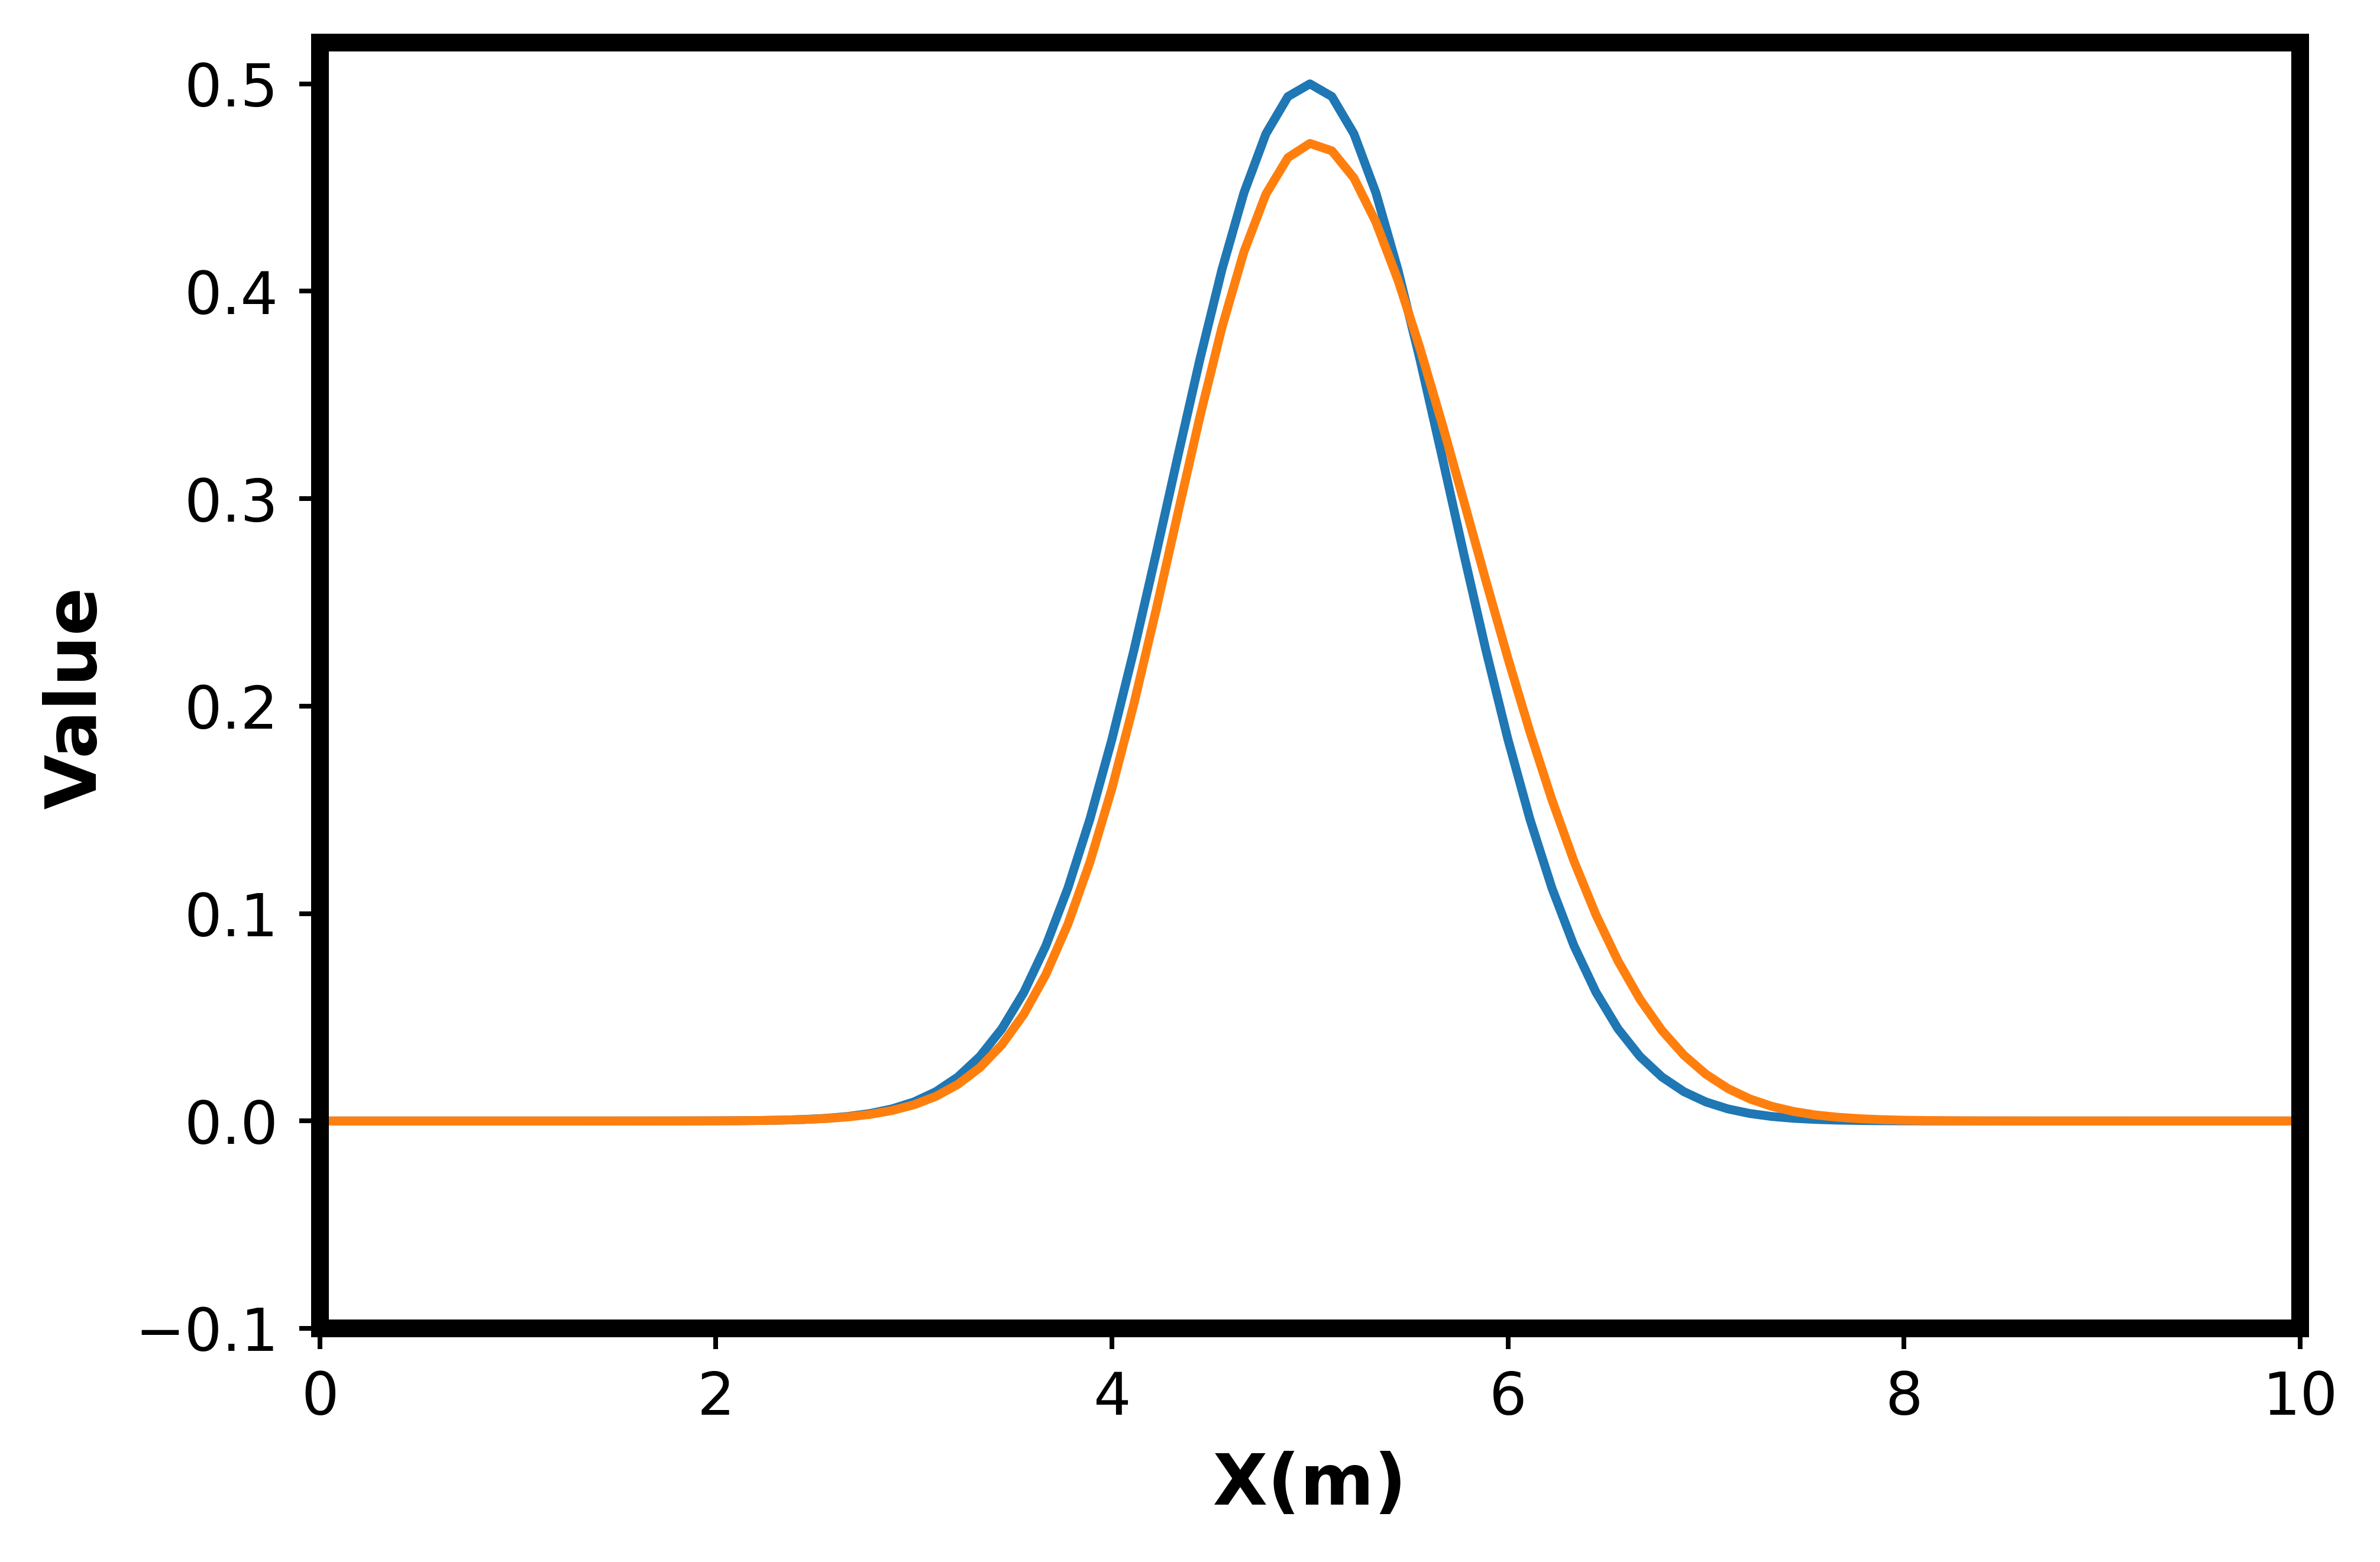

In [11]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X(m) ',fontsize=12,fontweight='bold')
plt.ylabel('Value ',fontsize=12,fontweight='bold')
plt.xlim(left=0,right=length)
plt.ylim(bottom=-.1,top=.52)
plt.plot(np.linspace(0,length,nx),u_initial)
plt.plot(np.linspace(0,length,nx),u)